ARIMA EVO

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import funcs_for_proc
from transformator import (
    relative_concentration, get_accepted_maximum_value,
    get_all_relative_concentration)
import warnings
warnings.simplefilter("ignore", UserWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
from itertools import product
from tqdm import tqdm

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [2]:
data = funcs_for_proc.get_data_from_csv('final_data/data_train/data_train', 'csv','final_data/train.csv')


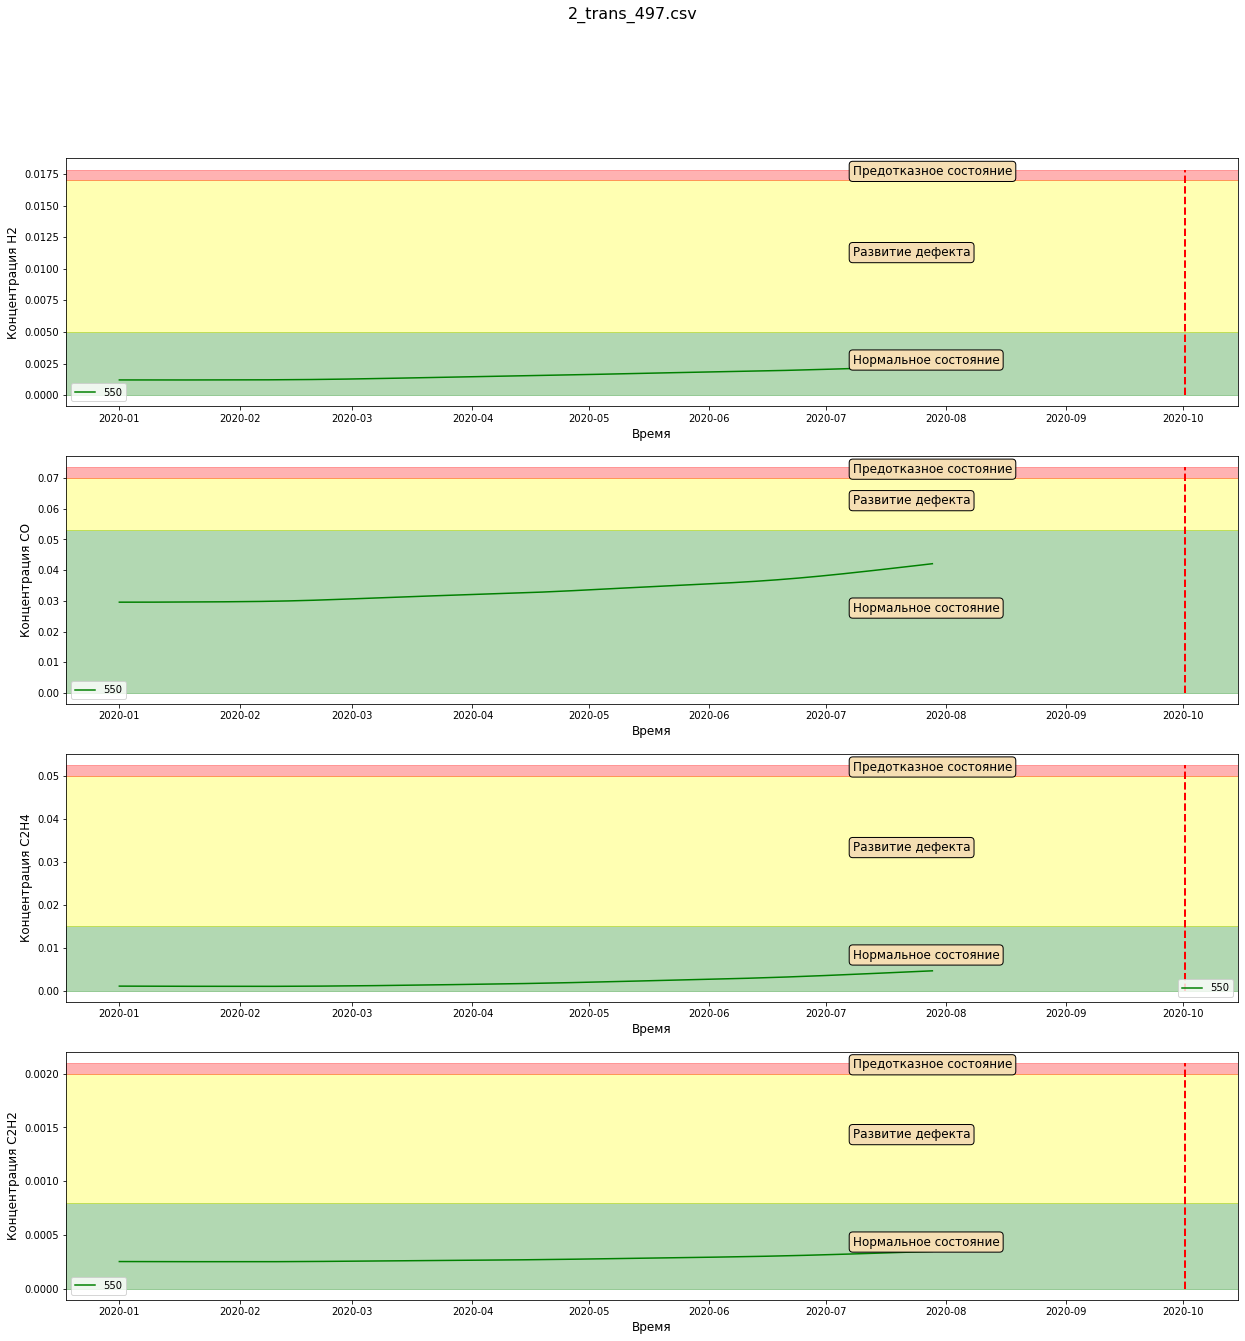

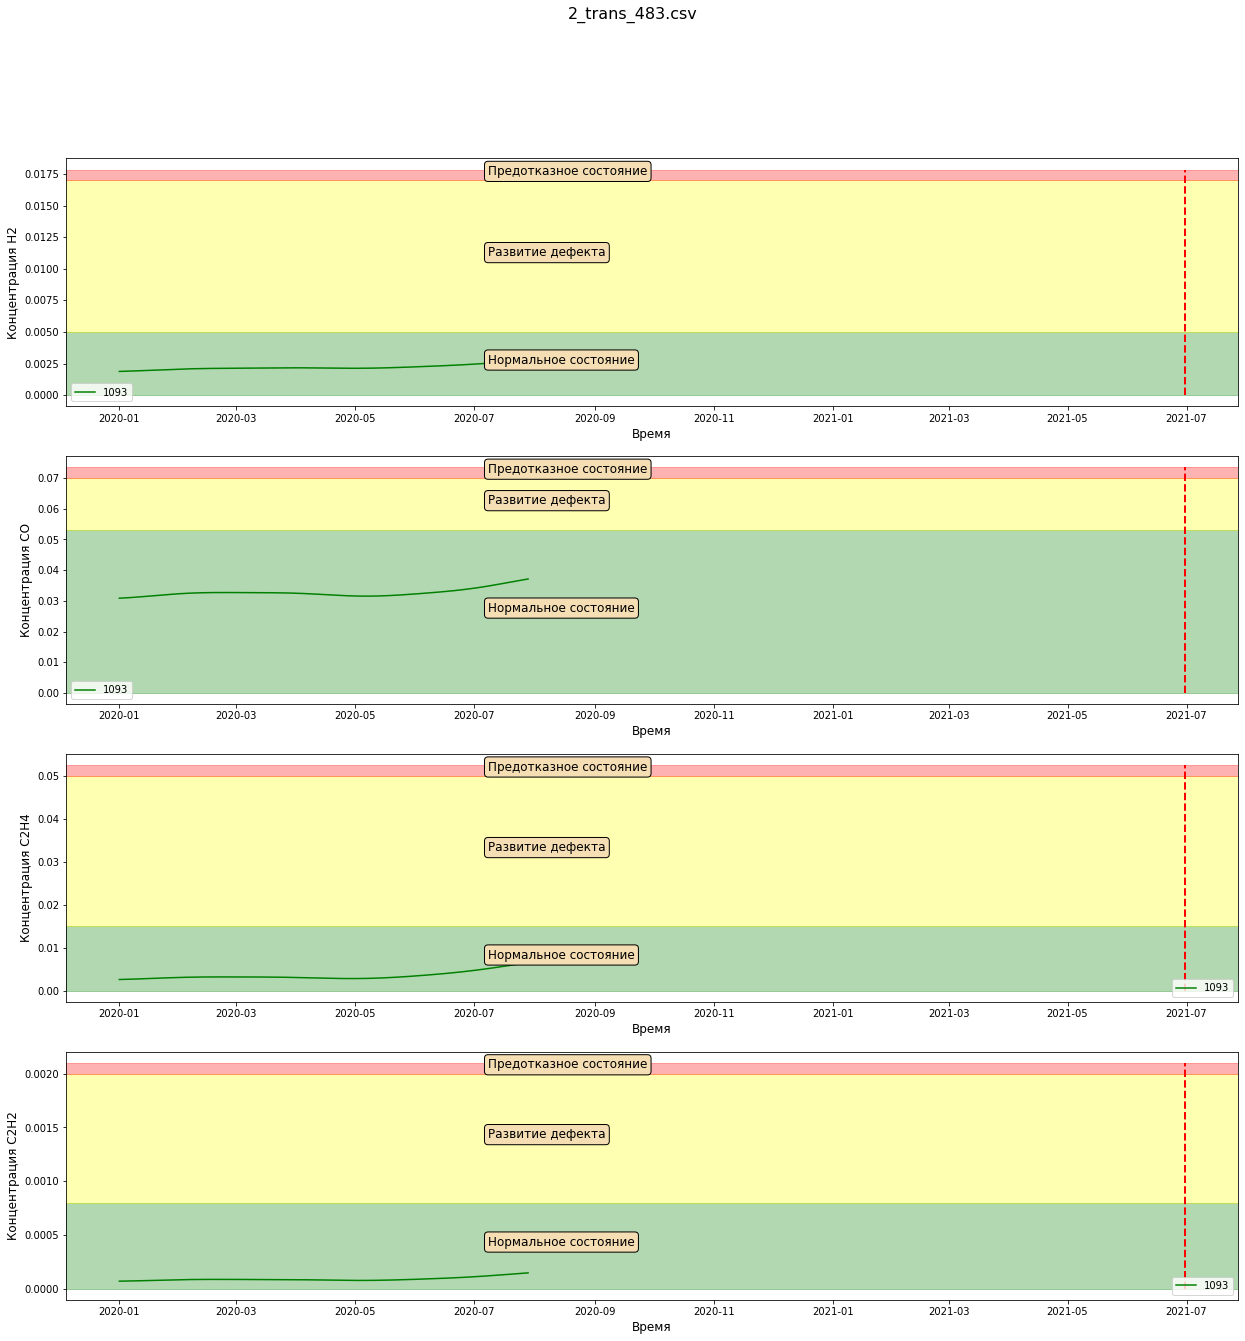

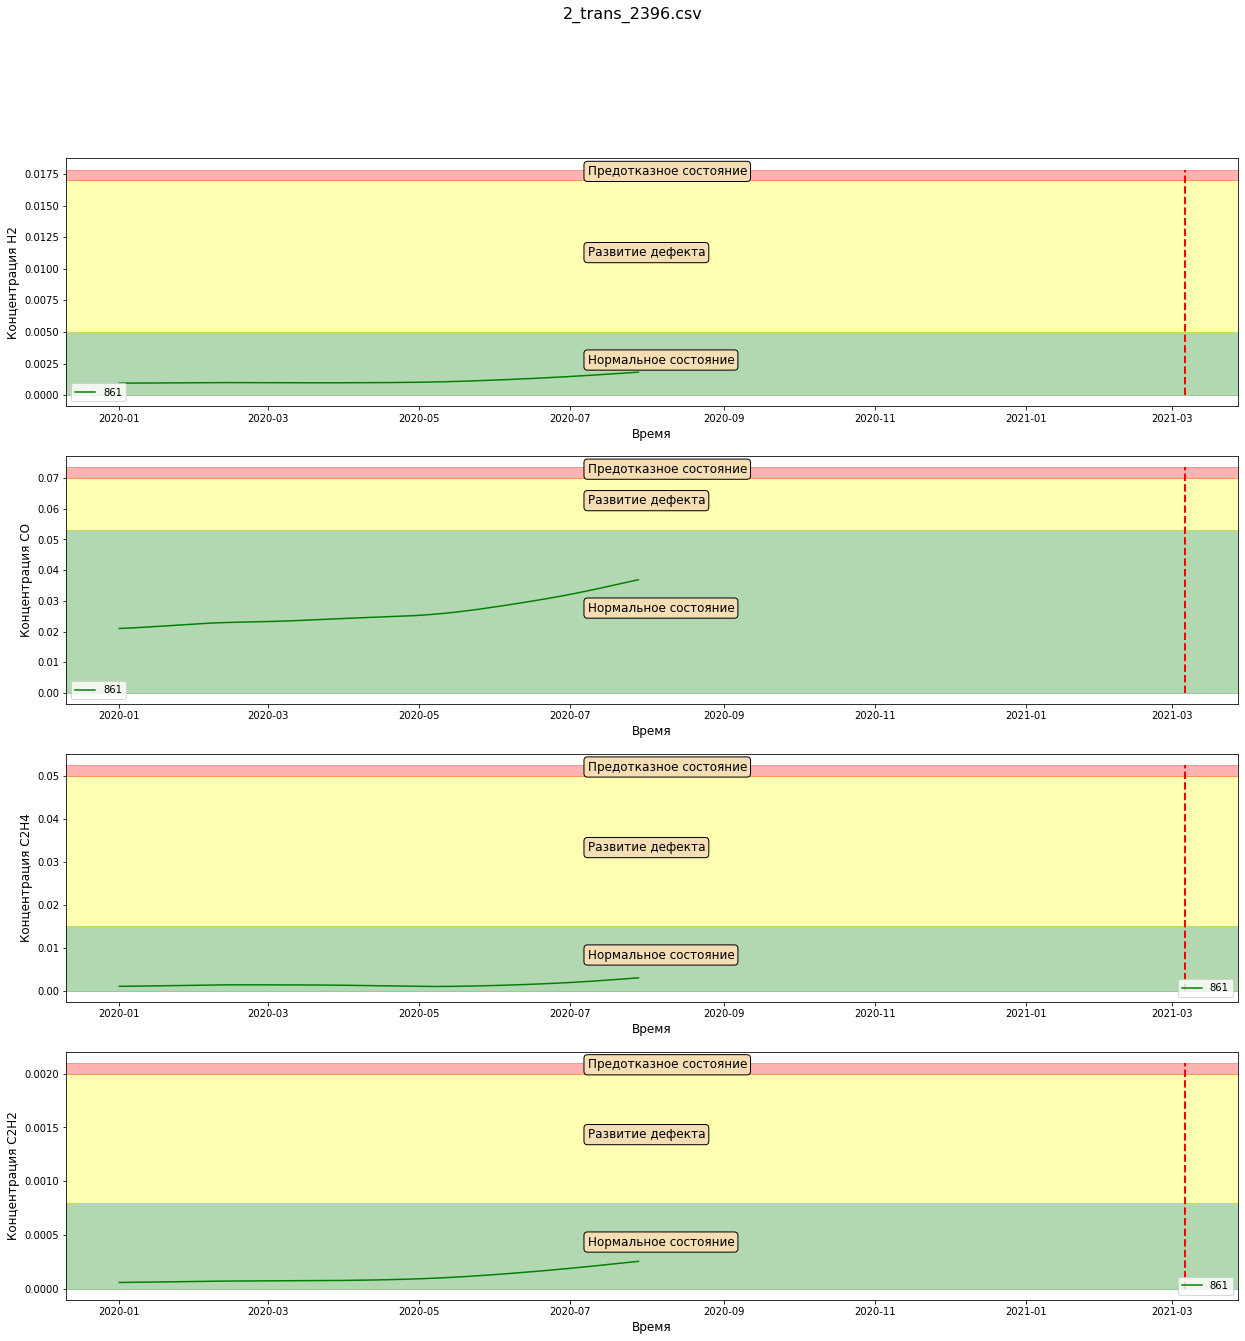

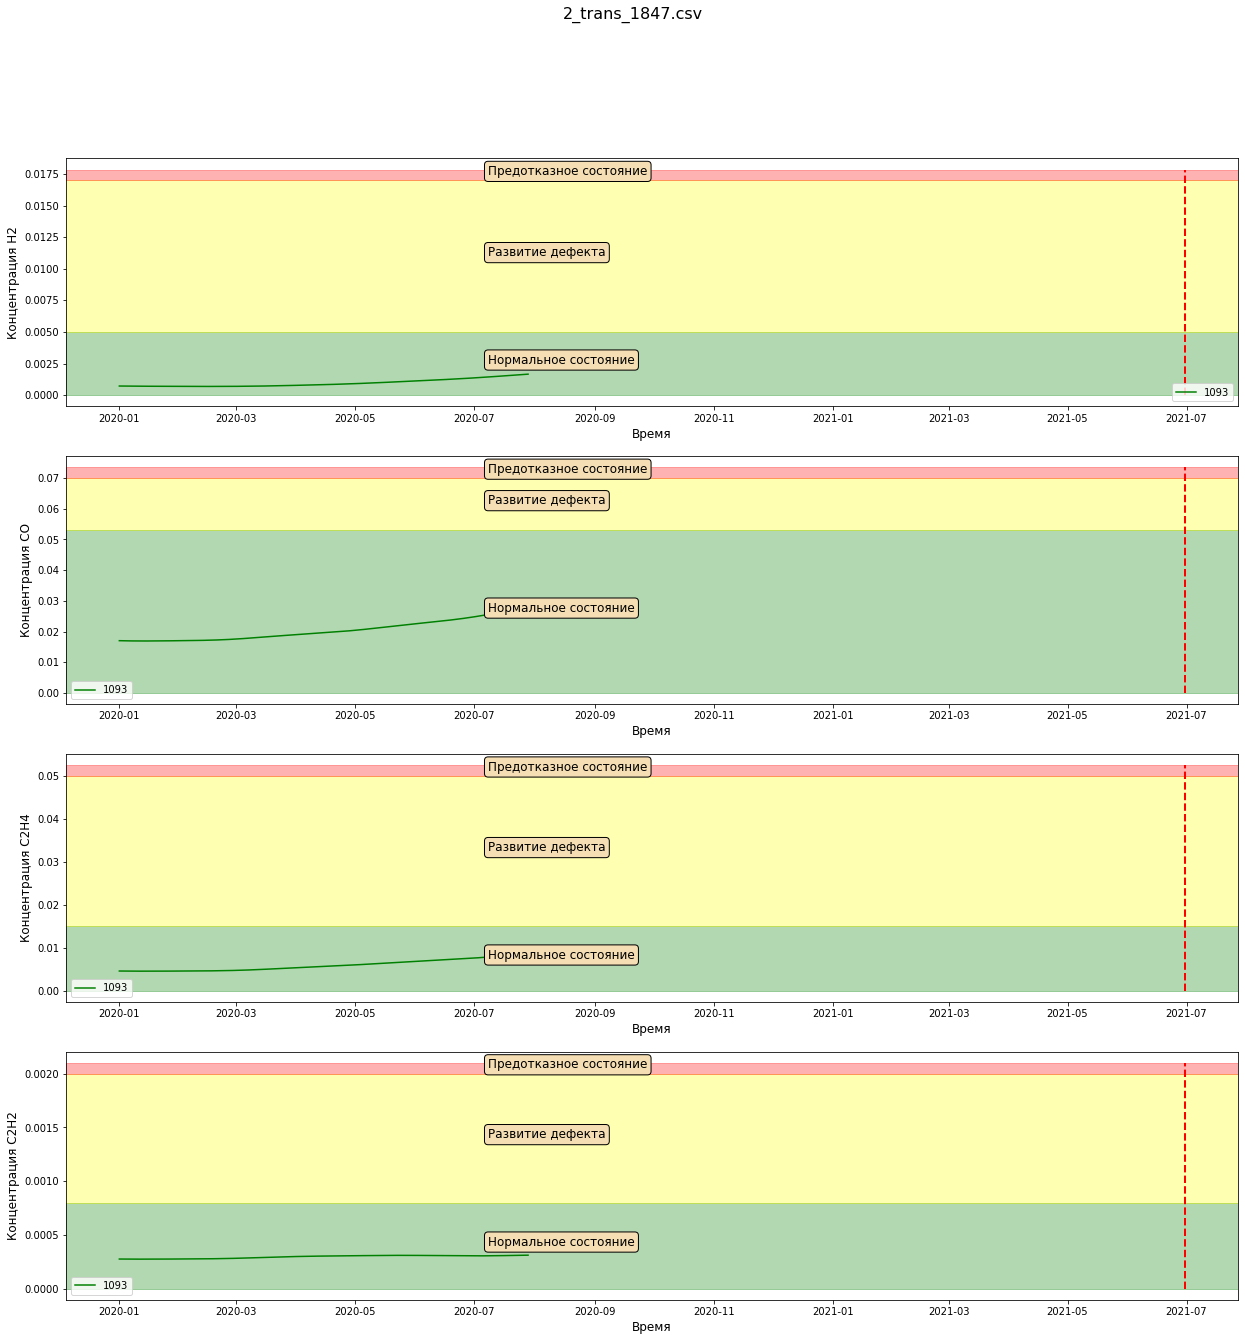

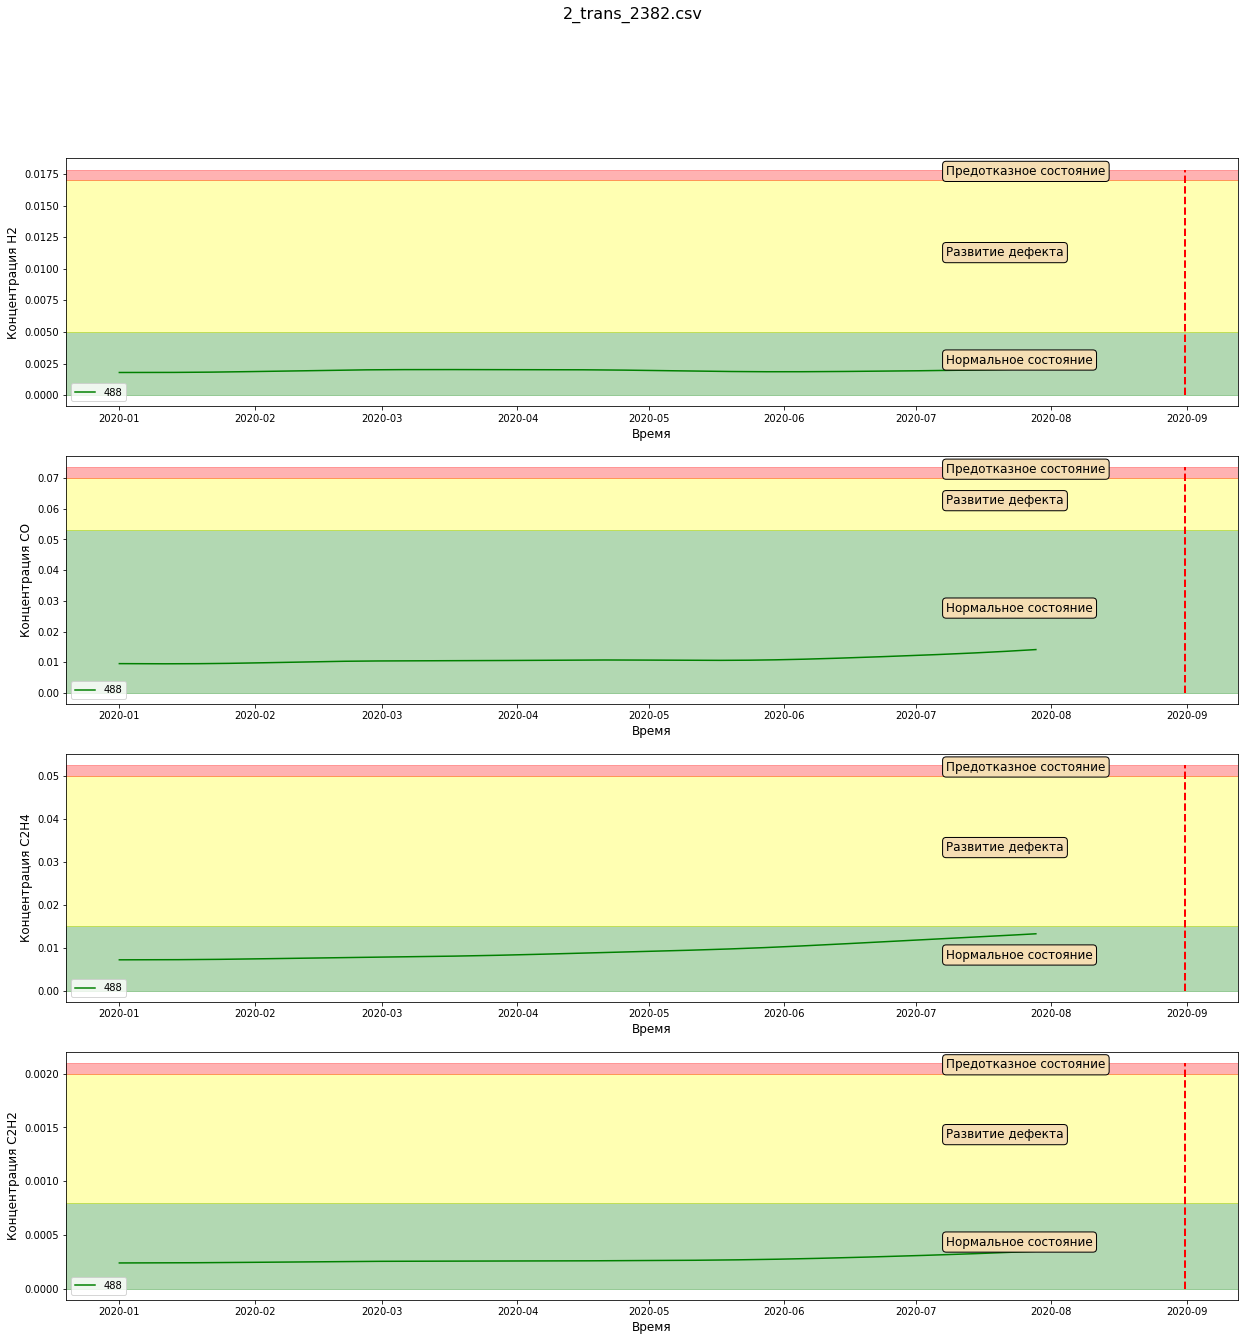

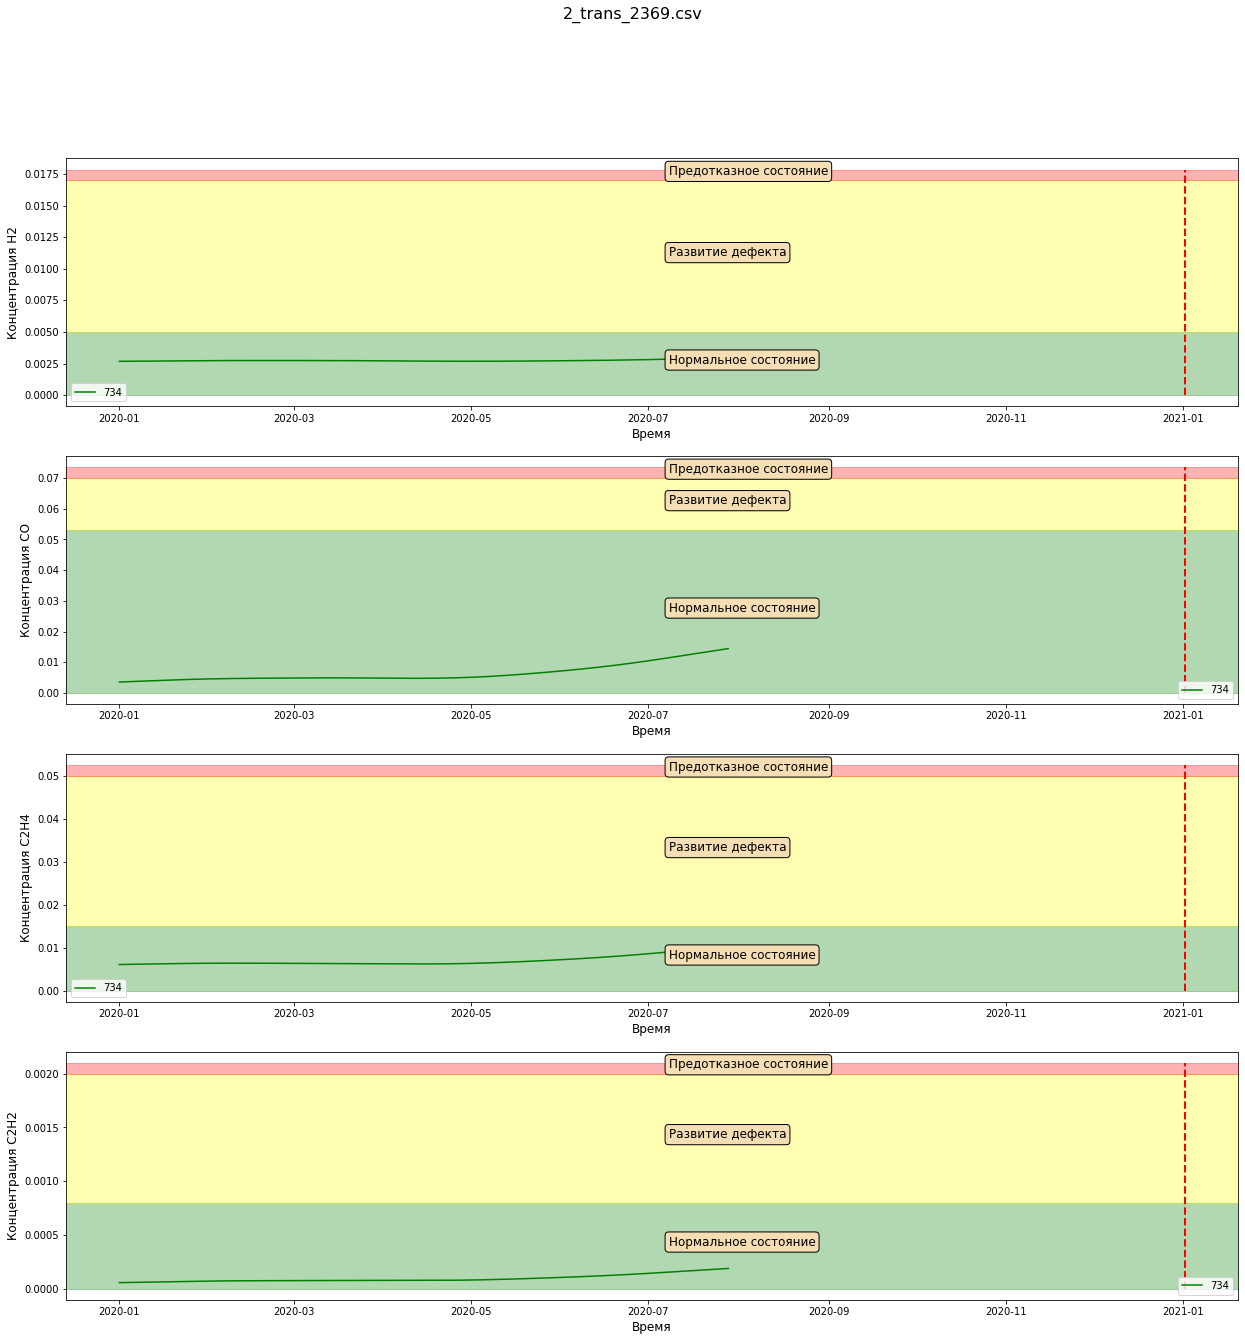

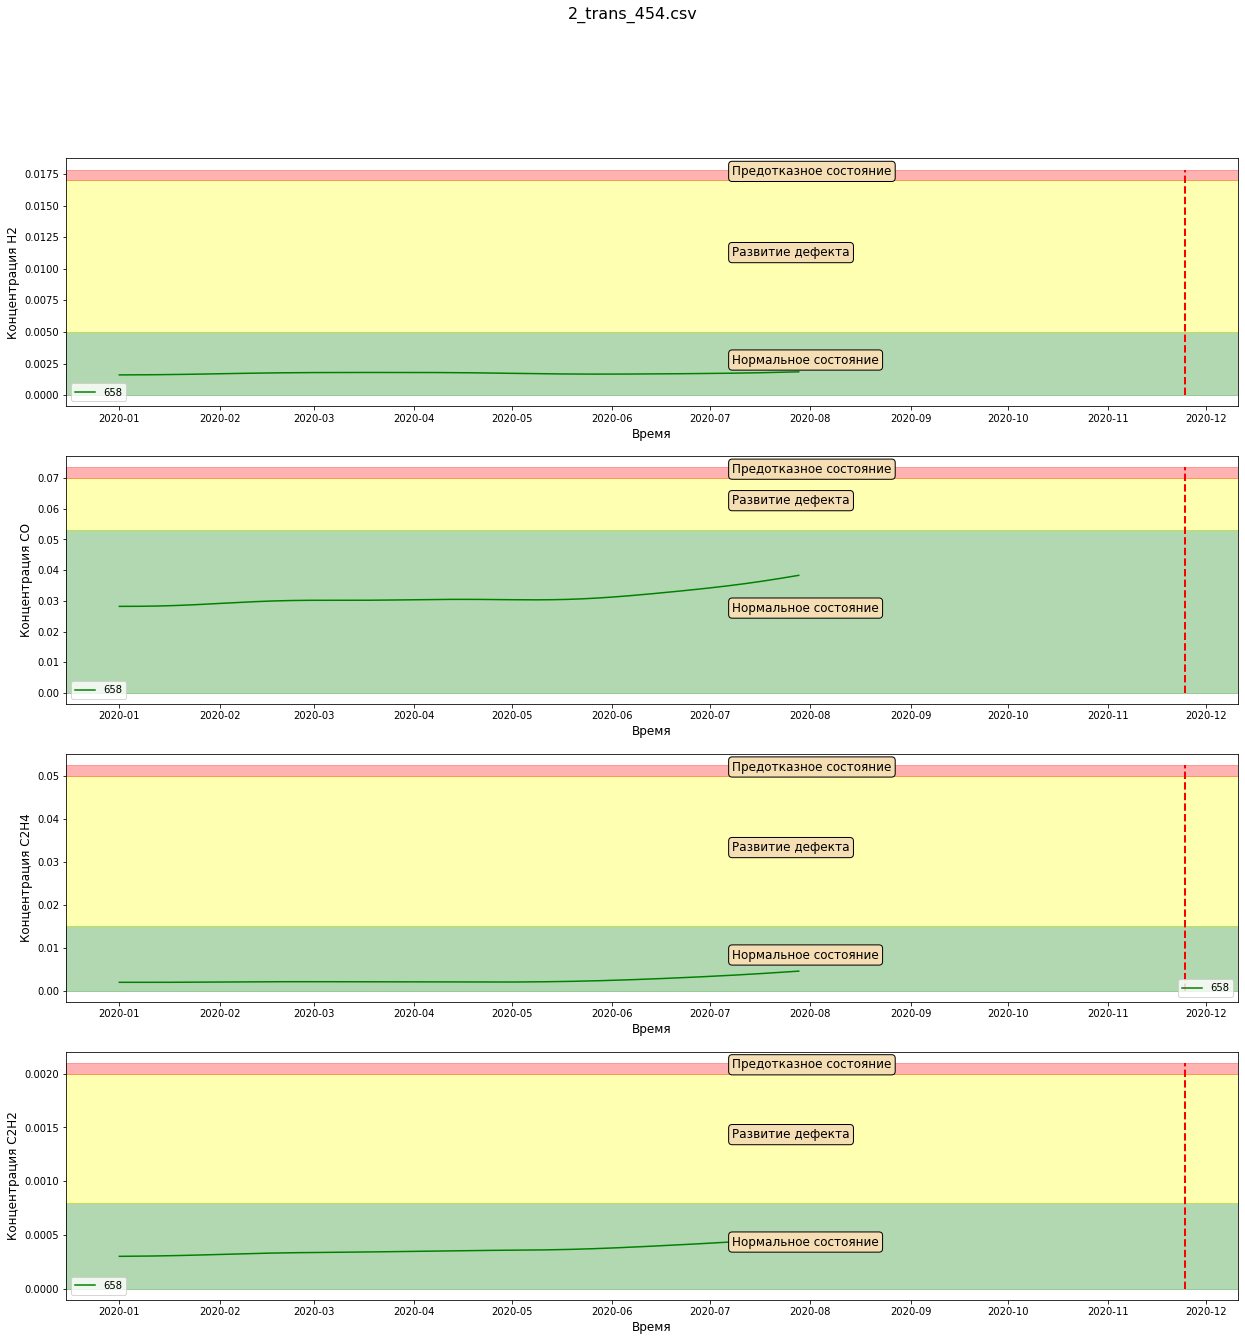

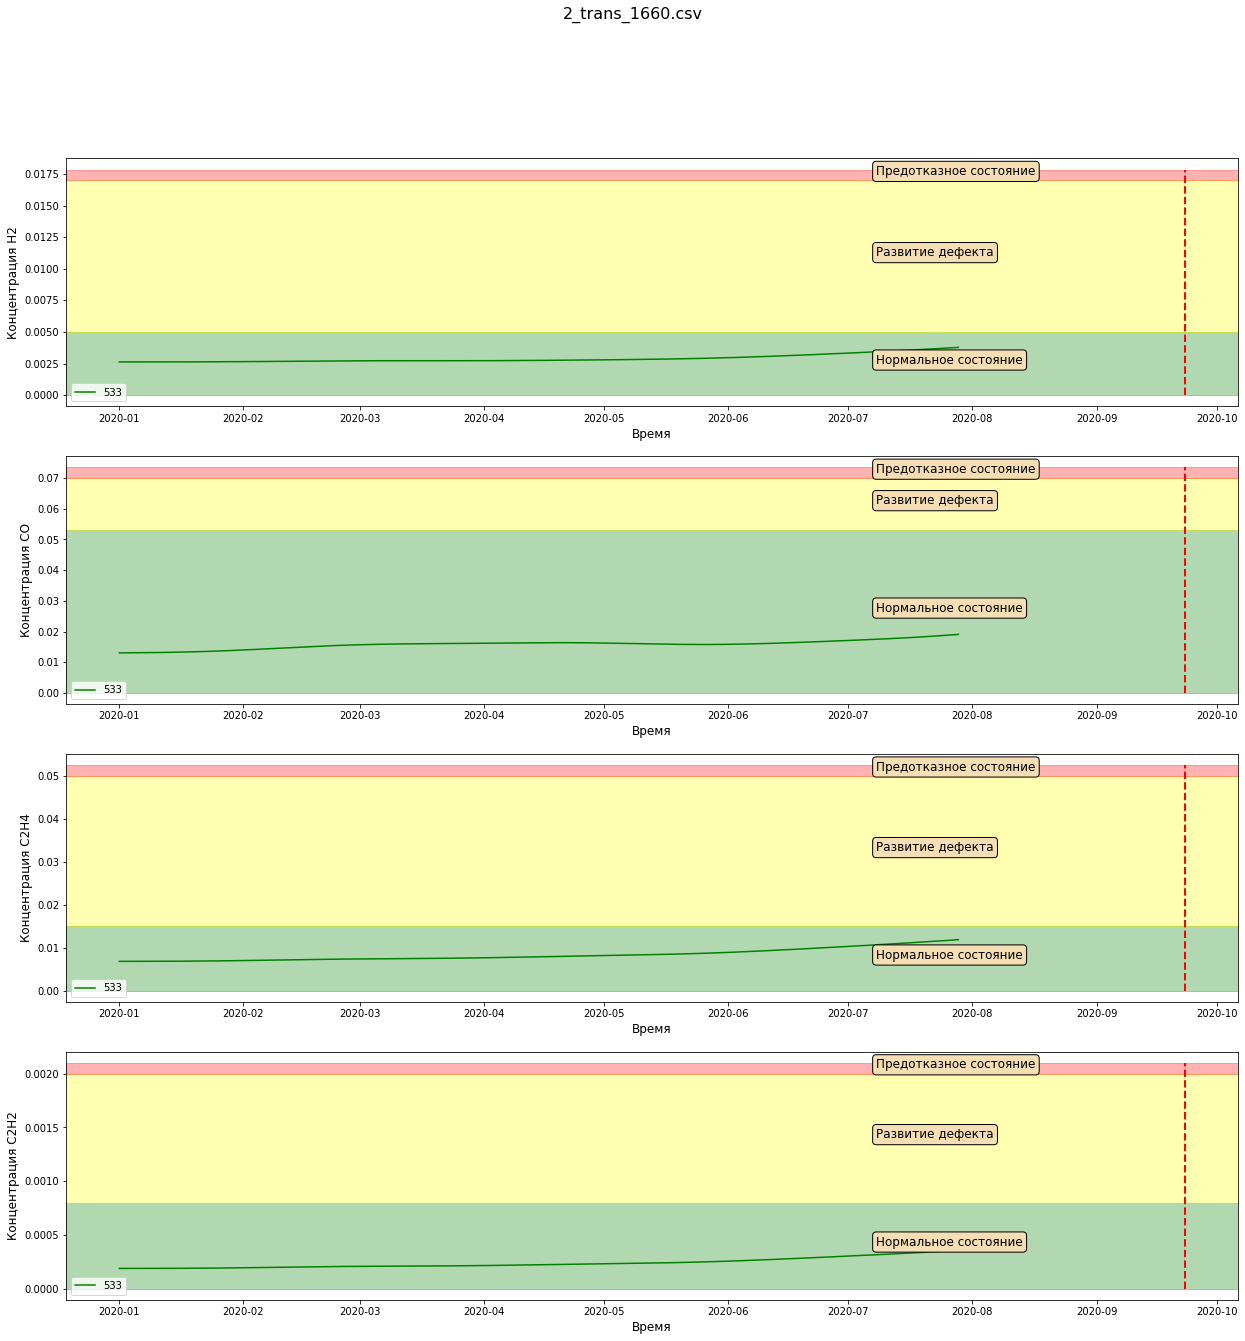

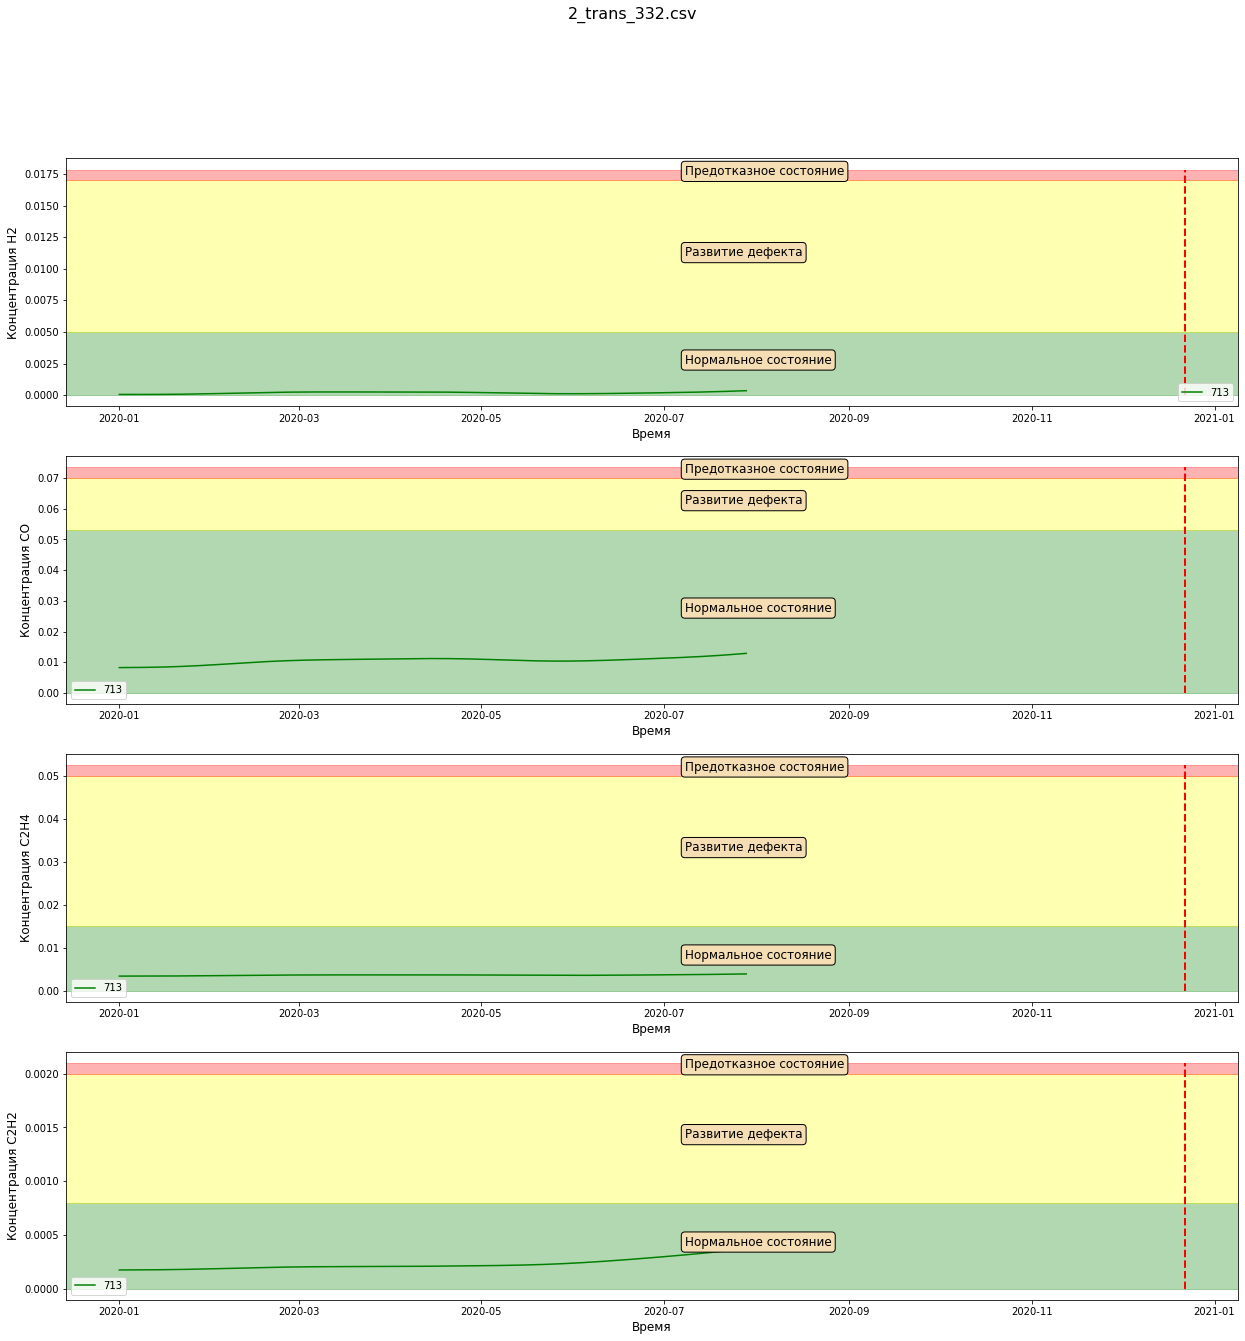

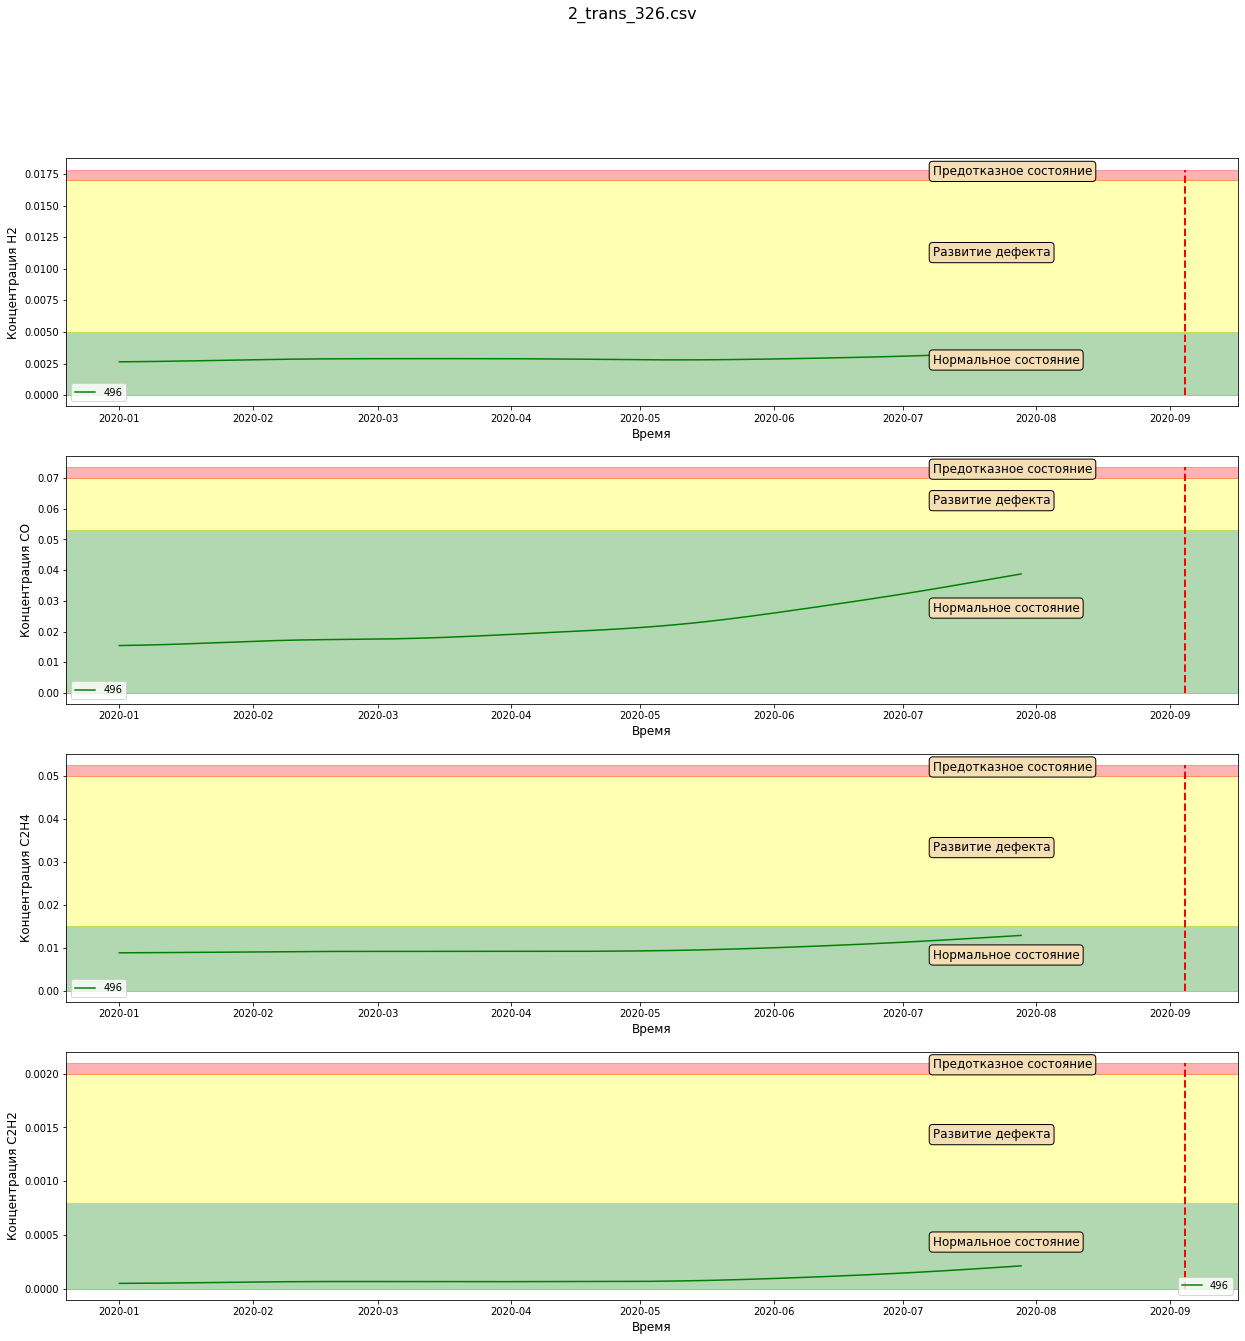

In [3]:
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
for file in data[:10]:
    fig, ax = plt.subplots(4, 1, figsize=(21, 21))
    fig.suptitle(file[0], fontsize=16)
    data_normal=file[2]
    pred=file[1]
    for i, gas in enumerate(['H2', 'CO', 'C2H4', 'C2H2']):
        datetime_pred= pd.date_range("2020-01-01", periods=pred, freq='12H')
        accepted_level = get_accepted_maximum_value(gas, 0, '220kW')[0]
        maximum_level = get_accepted_maximum_value(gas, 0, '220kW')[1]
        max_axhspan_level = max(data_normal[gas].max(),maximum_level)*1.05

        max_text_level = (max_axhspan_level - maximum_level) / 2 + maximum_level
        accepted_text_level = (maximum_level - accepted_level) / 2 + accepted_level
        normal_text_level = accepted_level / 2
        text_egle = round(len(data_normal.index) * 0.90) 
        # Графики
        ax[i].vlines(datetime_pred[-1], 0, max_axhspan_level,
          color = 'r',
          linewidth = 2,
          linestyle = '--')
        ax[i].plot(data_normal.index, data_normal[gas], label=pred, color='green') 
        # Зоны
        ax[i].axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
        ax[i].axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
        ax[i].axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
#         Текст
        ax[i].text(data_normal.index[text_egle], max_text_level, "Предотказное состояние", fontsize=12, color='black',
                  bbox=props)
        ax[i].text(data_normal.index[text_egle], accepted_text_level, "Развитие дефекта", fontsize=12, color='black',
                  bbox=props)
        ax[i].text(data_normal.index[text_egle], normal_text_level, "Нормальное состояние", fontsize=12, color='black',
                  bbox=props)
        ax[i].set_xlabel("Время", fontsize=12)
        ax[i].set_ylabel(f'Концентрация {gas}', fontsize=12)
        ax[i].legend()

    plt.show()

Dickey-Fuller test H2 (1.3609304927843584, 0.9969292222117555, 12, 407, {'1%': -3.4465195891135845, '5%': -2.8686676281678634, '10%': -2.5705668101226085}, -15483.195027483278)


<Figure size 1512x1512 with 0 Axes>

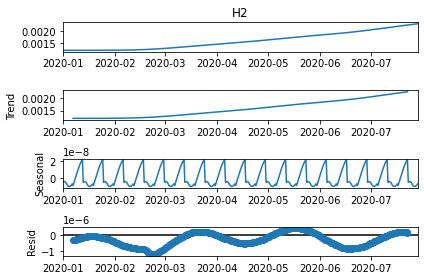

Dickey-Fuller test CO (4.498796865791165, 1.0, 5, 414, {'1%': -3.4462444670071046, '5%': -2.8685466682709975, '10%': -2.5705023309762187}, -13487.379833818793)


<Figure size 1512x1512 with 0 Axes>

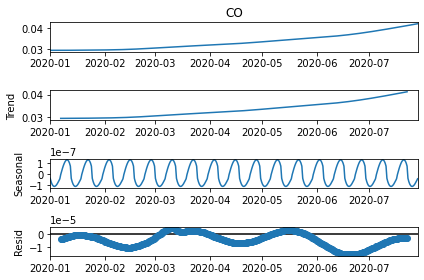

Dickey-Fuller test C2H4 (1.2988440035120563, 0.9966024555914321, 3, 416, {'1%': -3.4461675720270404, '5%': -2.8685128587855955, '10%': -2.5704843086630915}, -14436.570391982847)


<Figure size 1512x1512 with 0 Axes>

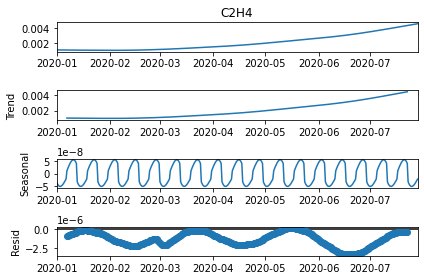

Dickey-Fuller test C2H2 (3.24581181840072, 1.0, 5, 414, {'1%': -3.4462444670071046, '5%': -2.8685466682709975, '10%': -2.5705023309762187}, -17244.678303295663)


<Figure size 1512x1512 with 0 Axes>

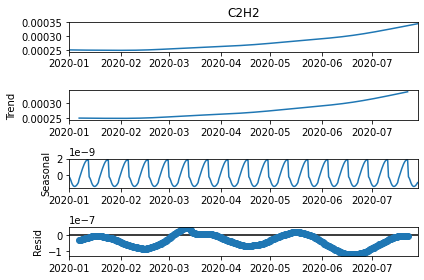

In [4]:
for file in data[:1]:
    data_normal=file[2]
    pred=file[1]
    for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
        plt.figure(figsize=(21, 21))
        print("Dickey-Fuller test %s" %gas,sm.tsa.stattools.adfuller(data_normal[gas]))
        sm.tsa.seasonal_decompose(data_normal[gas]).plot()
        plt.show()


Dickey-Fuller test H2  0.358061
unstat


<Figure size 1512x1512 with 0 Axes>

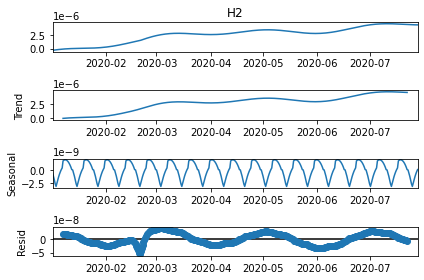

Dickey-Fuller test CO  0.979726
unstat


<Figure size 1512x1512 with 0 Axes>

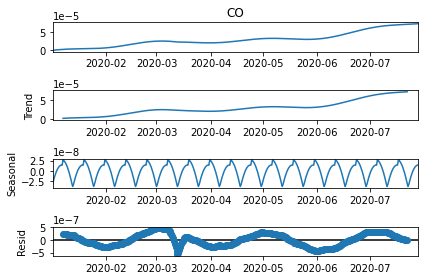

Dickey-Fuller test C2H4  0.874166
unstat


<Figure size 1512x1512 with 0 Axes>

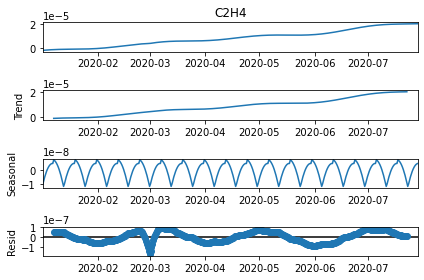

Dickey-Fuller test C2H2  0.939054
unstat


<Figure size 1512x1512 with 0 Axes>

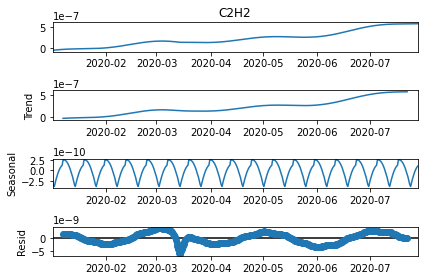

In [5]:
for file in data[:1]:
    data_normal=file[2].diff(periods=1).dropna()
    pred=file[1]
    for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
        plt.figure(figsize=(21, 21))
        restest=sm.tsa.stattools.adfuller(data_normal[gas])
        print("Dickey-Fuller test %s  %f" %(gas,restest[1]))
        if restest[0]> restest[4]['5%']: 
            print ('unstat')
        else:
            print('stat')
        sm.tsa.seasonal_decompose(data_normal[gas]).plot()
        plt.show()



Dickey-Fuller test H2  0.008858
stat


<Figure size 1512x1512 with 0 Axes>

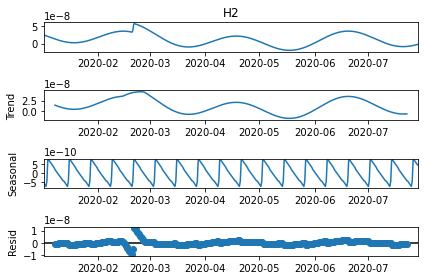

Dickey-Fuller test CO  0.037565
stat


<Figure size 1512x1512 with 0 Axes>

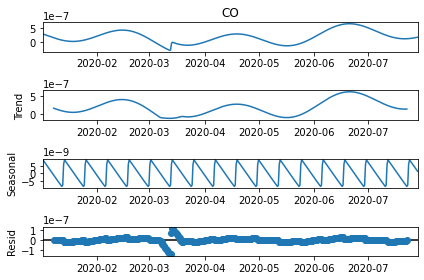

Dickey-Fuller test C2H4  0.194479
unstat


<Figure size 1512x1512 with 0 Axes>

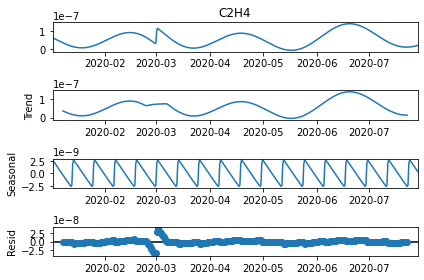

Dickey-Fuller test C2H2  0.037576
stat


<Figure size 1512x1512 with 0 Axes>

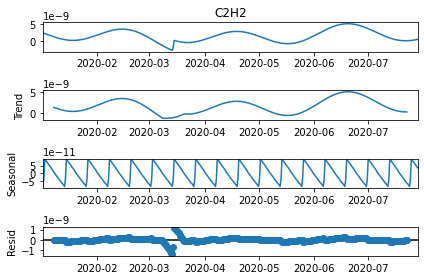

In [6]:
for file in data[:1]:
    data_normal=file[2].diff().dropna().diff().dropna()
    pred=file[1]
    for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
        plt.figure(figsize=(21, 21))
        restest=sm.tsa.stattools.adfuller(data_normal[gas])
        print("Dickey-Fuller test %s  %f" %(gas,restest[1]))
        if restest[0]> restest[4]['5%']: 
            print ('unstat')
        else:
            print('stat')
        sm.tsa.seasonal_decompose(data_normal[gas]).plot()
        plt.show()



In [7]:
file=data[30]
data_normal=file[2]
mindfGas=pd.DataFrame()
model_res={}
for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
    print('----------------------------------------------------\nGAS %s'%gas)
    df=pd.DataFrame(columns=['aic','param','param_seasonal'])
    p  = q = range(0, 2)
    d=[2]
    pdq = list(product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 1) for x in pdq]
    warnings.filterwarnings("ignore") 
    aics=[]
    params=[]
    param_seasonals=[]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(data_normal[gas],
                                                order=param,
                                                
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
                aics.append(results.aic)
                params.append(param)
                param_seasonals.append(param_seasonal)
            except BaseException as e :
                continue
    df=pd.DataFrame({'aic':aics,'param':params,'param_seasonal':param_seasonals})
    minaic_param=df[df.aic == df.aic.min()].iloc[[0]]
    print(minaic_param)
    print(minaic_param.param.values,minaic_param.param_seasonal.values)
    mod = sm.tsa.statespace.SARIMAX(data_normal[gas],
                                order=minaic_param.param.values[0],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    model_res[gas] = mod.fit()

    print(model_res[gas].summary().tables[1])

----------------------------------------------------
GAS H2
ARIMA(0, 2, 0)x(0, 2, 0, 1) - AIC:nan
ARIMA(0, 2, 0)x(0, 2, 1, 1) - AIC:nan
ARIMA(0, 2, 0)x(1, 2, 0, 1) - AIC:nan
ARIMA(0, 2, 0)x(1, 2, 1, 1) - AIC:nan
ARIMA(0, 2, 1)x(0, 2, 0, 1) - AIC:-8218.269594928612
ARIMA(0, 2, 1)x(0, 2, 1, 1) - AIC:-8218.269594928612
ARIMA(0, 2, 1)x(1, 2, 0, 1) - AIC:-8218.269594928612
ARIMA(0, 2, 1)x(1, 2, 1, 1) - AIC:-8218.269594928612
ARIMA(1, 2, 0)x(0, 2, 0, 1) - AIC:-9406.527450597057
ARIMA(1, 2, 0)x(0, 2, 1, 1) - AIC:-9406.527450597057
ARIMA(1, 2, 0)x(1, 2, 0, 1) - AIC:-9406.527450597057
ARIMA(1, 2, 0)x(1, 2, 1, 1) - AIC:-9406.527450597057
ARIMA(1, 2, 1)x(0, 2, 0, 1) - AIC:-8595.879490757869
ARIMA(1, 2, 1)x(0, 2, 1, 1) - AIC:-8595.879490757869
ARIMA(1, 2, 1)x(1, 2, 0, 1) - AIC:-8595.879490757869
ARIMA(1, 2, 1)x(1, 2, 1, 1) - AIC:-8595.879490757869
           aic      param param_seasonal
8 -9406.527451  (1, 2, 0)   (0, 2, 0, 1)
[(1, 2, 0)] [(0, 2, 0, 1)]
                 coef    std err          z

----------------------------------------------------
GAS H2


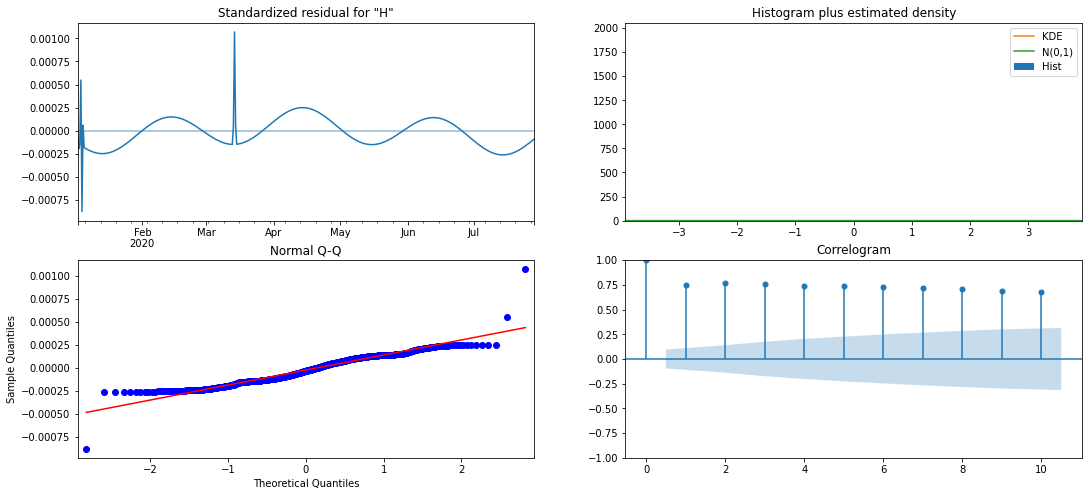

----------------------------------------------------
GAS CO


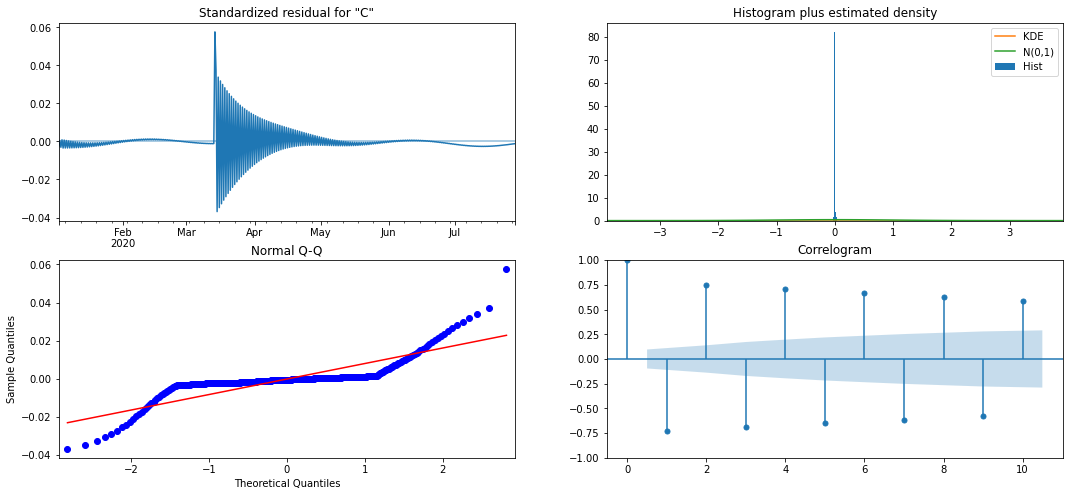

----------------------------------------------------
GAS C2H4


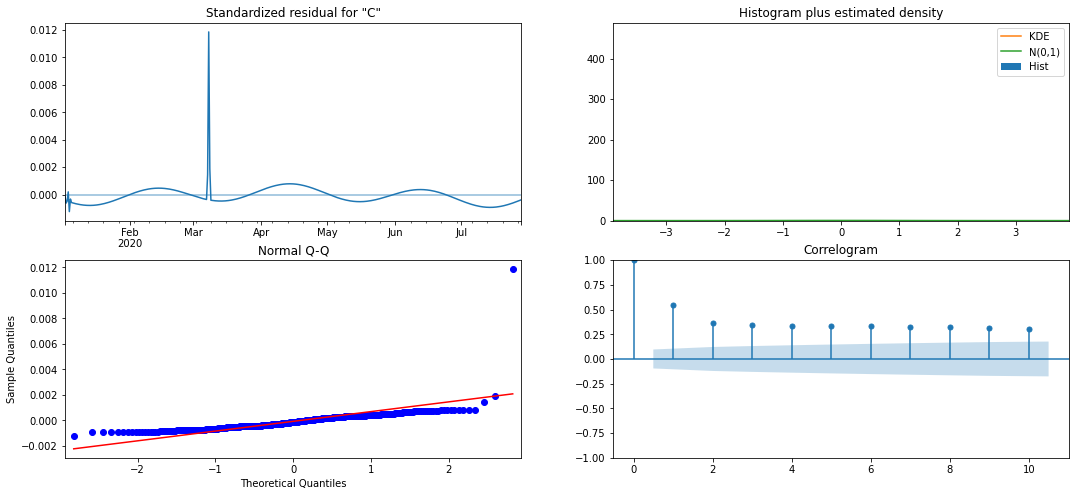

----------------------------------------------------
GAS C2H2


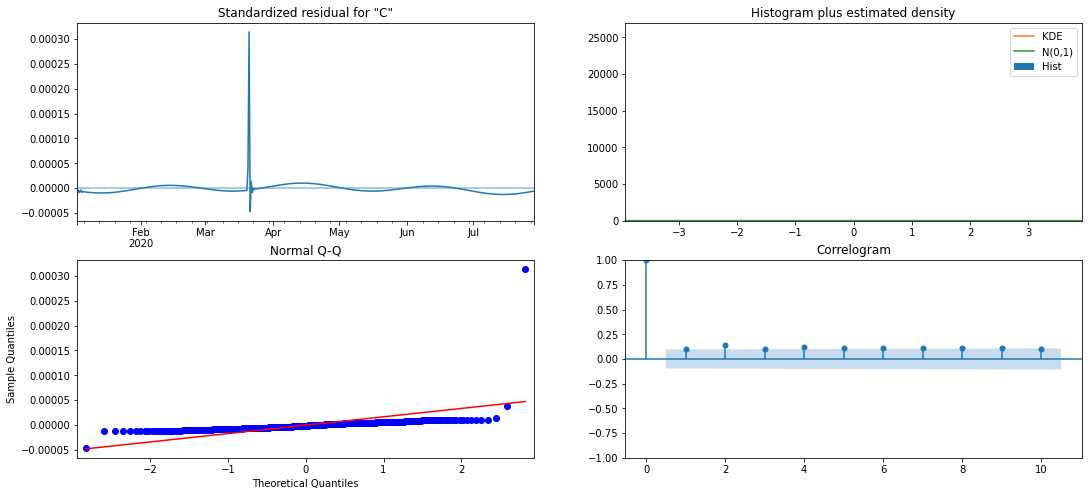

In [8]:
for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
    print('----------------------------------------------------\nGAS %s'%gas)
    model_res[gas].plot_diagnostics(figsize=(18, 8))
    model_forecast=model_res[gas]
    plt.show()

----------------------------------------------------
GAS H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 5.4e-09
----------------------------------------------------
GAS CO
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.674e-07
----------------------------------------------------
GAS C2H4
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.119e-07
----------------------------------------------------
GAS C2H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.8e-09


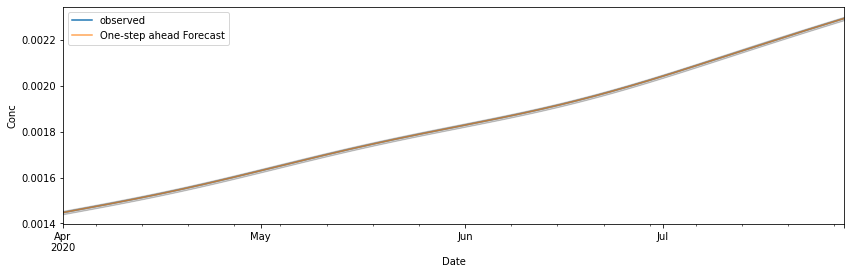

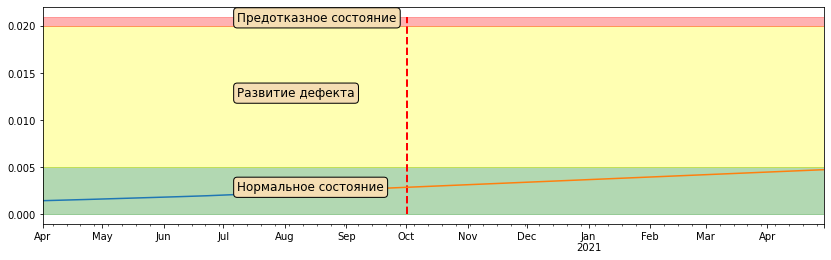

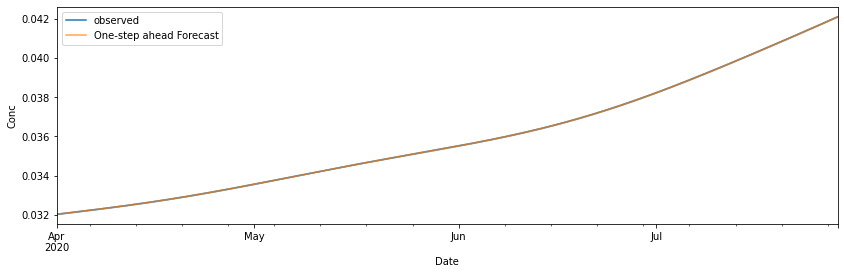

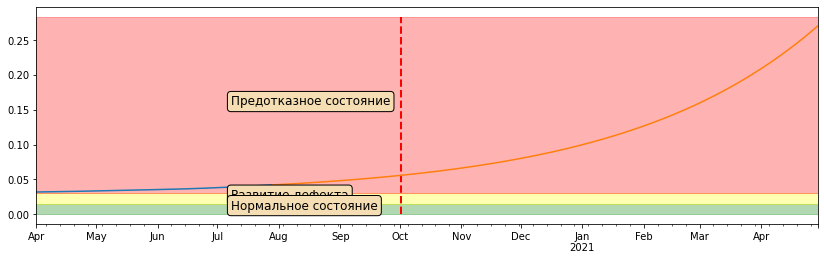

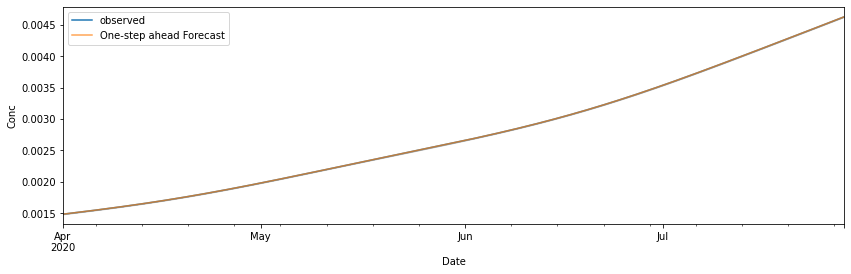

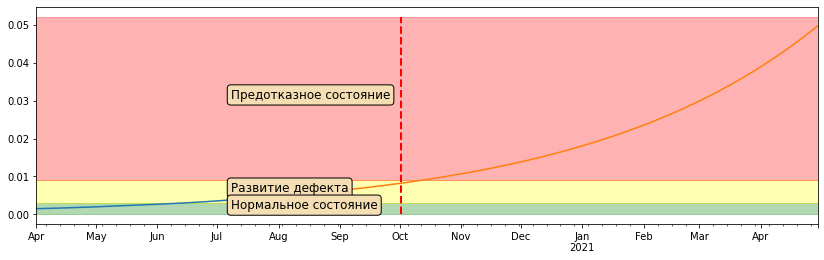

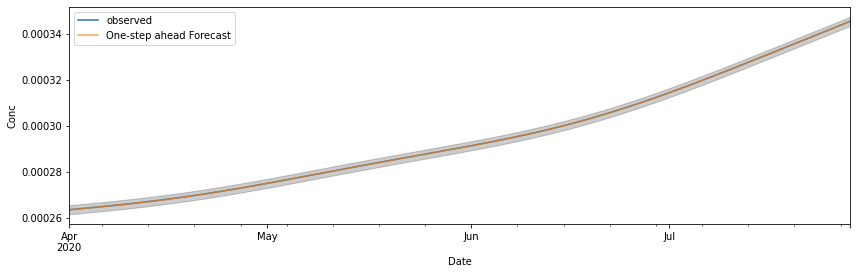

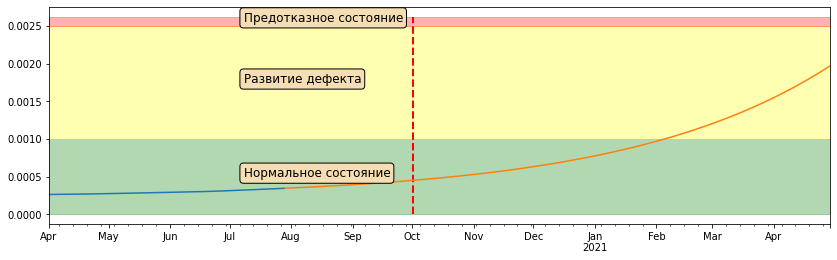

----------------------------------------------------
GAS H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 2.51e-08
----------------------------------------------------
GAS CO
The Mean Squared Error is 0.0
The Root Mean Squared Error is 3.798e-07
----------------------------------------------------
GAS C2H4
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.615e-07
----------------------------------------------------
GAS C2H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 9.1e-09


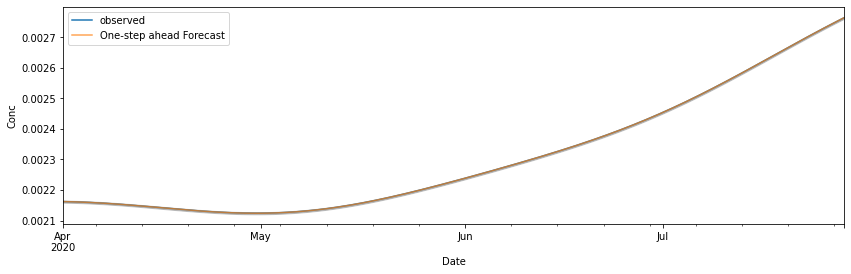

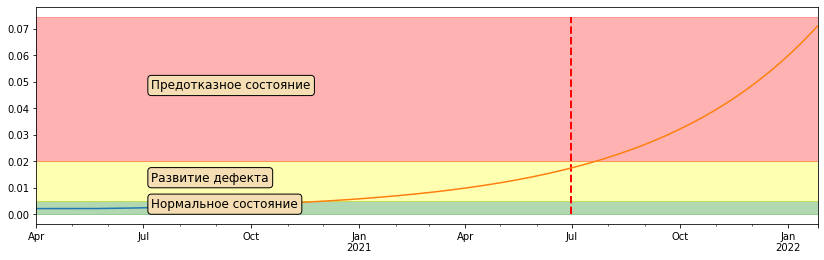

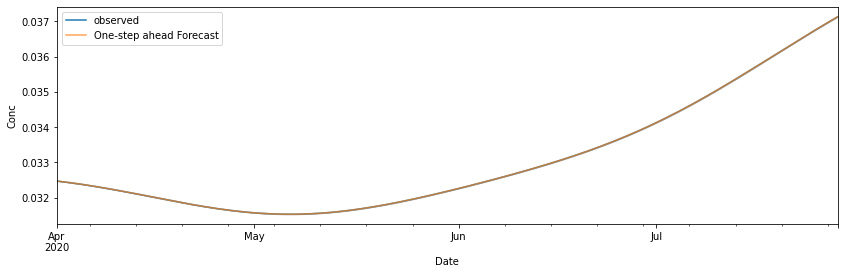

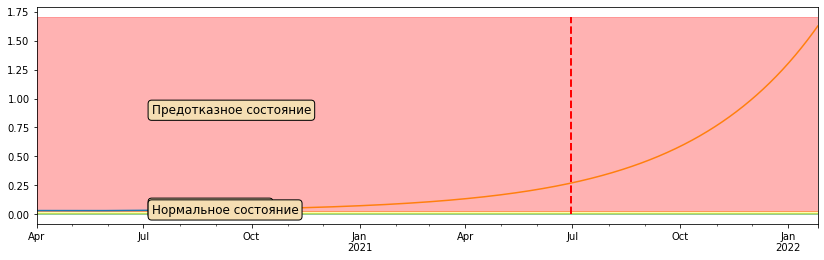

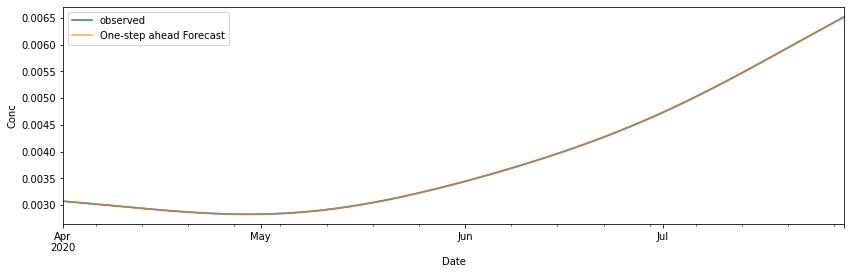

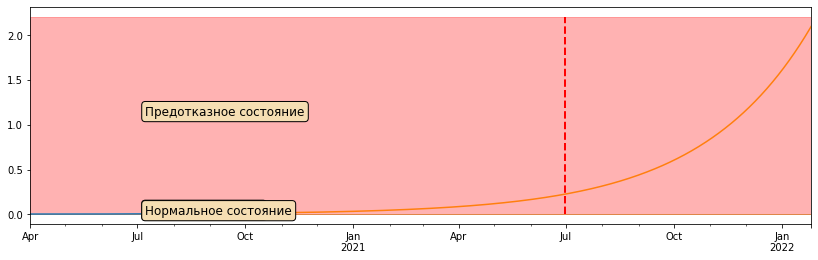

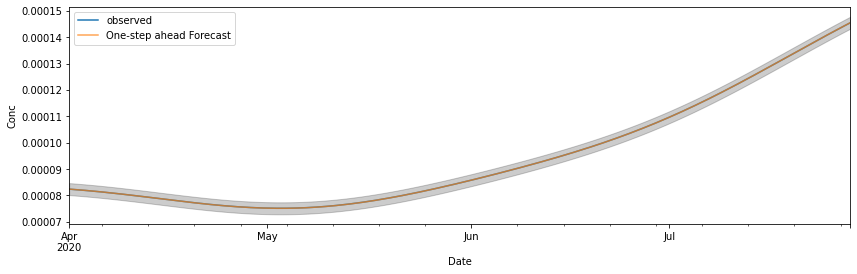

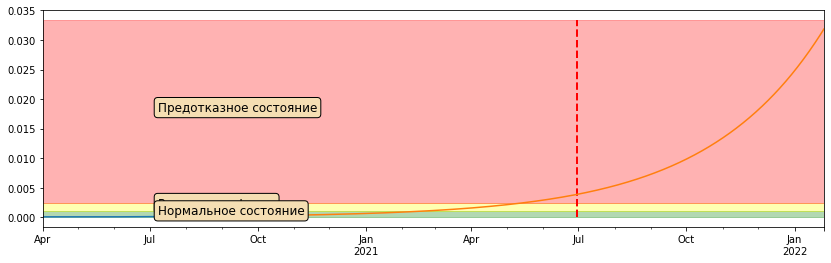

----------------------------------------------------
GAS H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.4e-08
----------------------------------------------------
GAS CO
The Mean Squared Error is 0.0
The Root Mean Squared Error is 2.118e-07
----------------------------------------------------
GAS C2H4
The Mean Squared Error is 0.0
The Root Mean Squared Error is 7.31e-08
----------------------------------------------------
GAS C2H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 3.5e-09


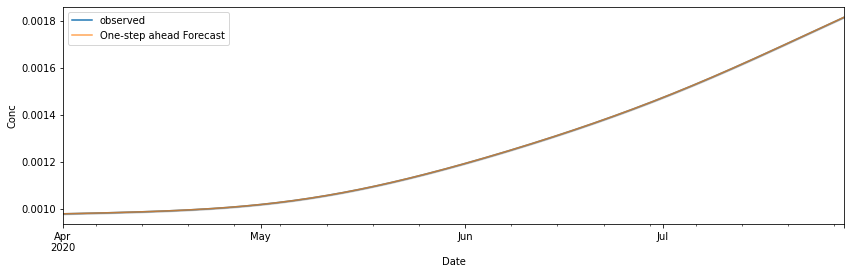

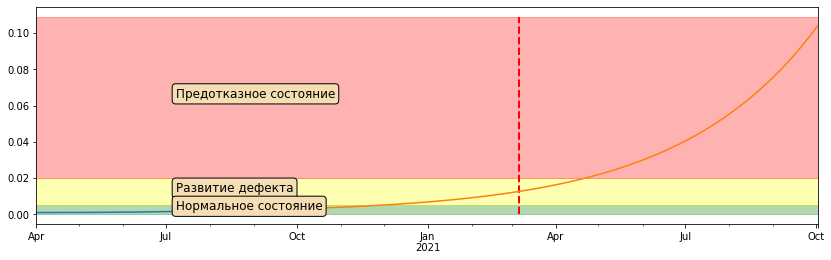

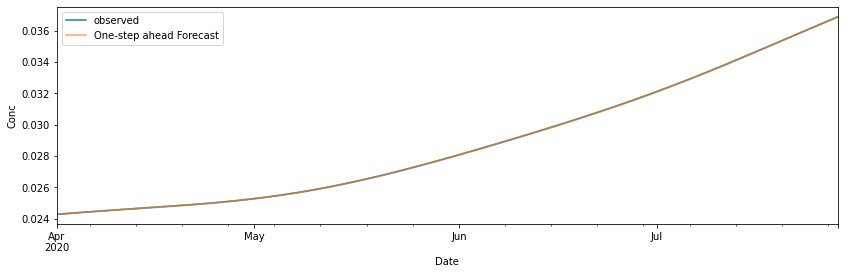

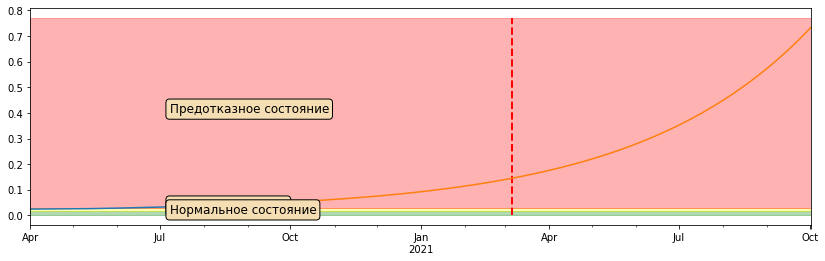

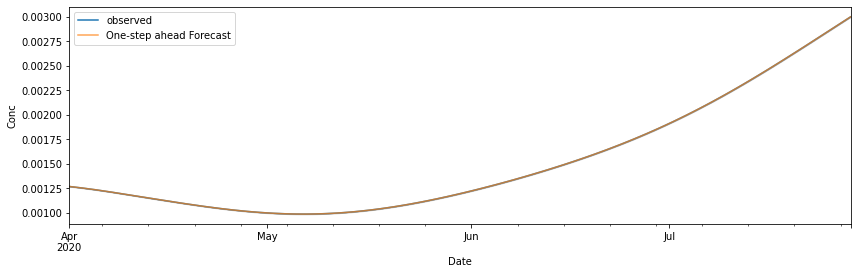

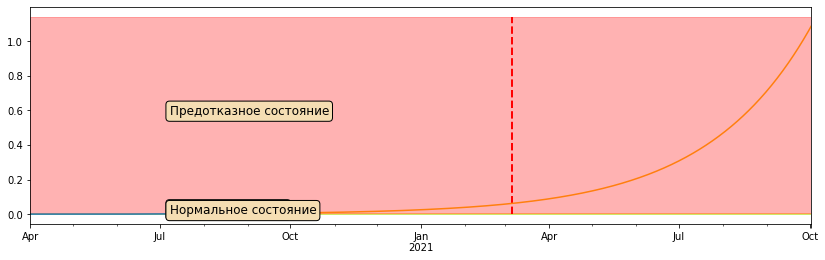

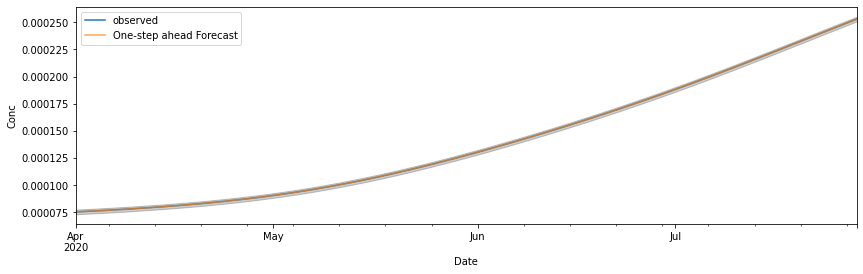

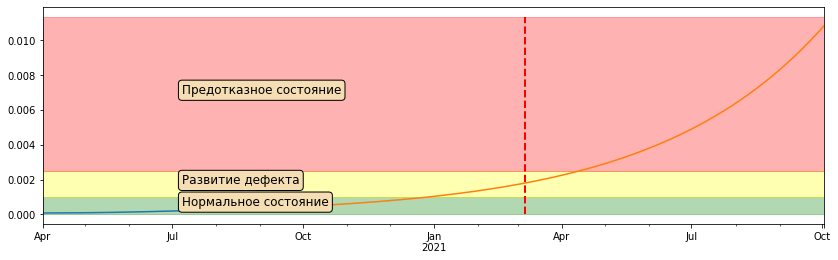

----------------------------------------------------
GAS H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 7.7e-09
----------------------------------------------------
GAS CO
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.883e-07
----------------------------------------------------
GAS C2H4
The Mean Squared Error is 0.0
The Root Mean Squared Error is 4.06e-08
----------------------------------------------------
GAS C2H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.04e-07


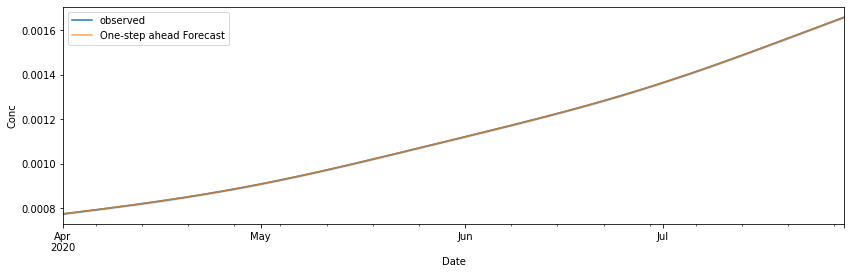

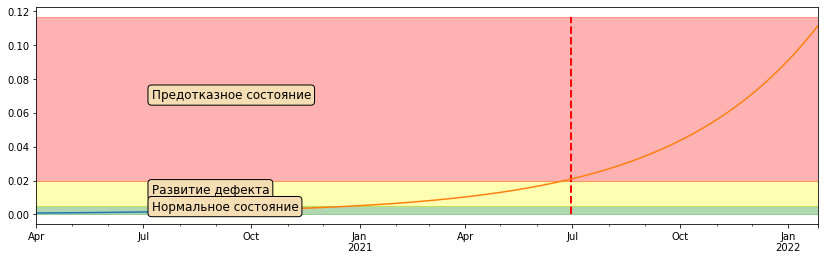

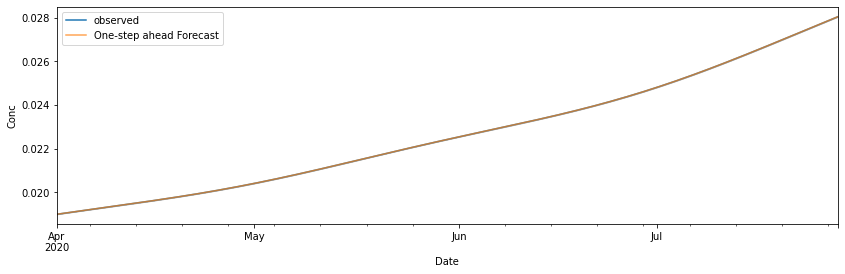

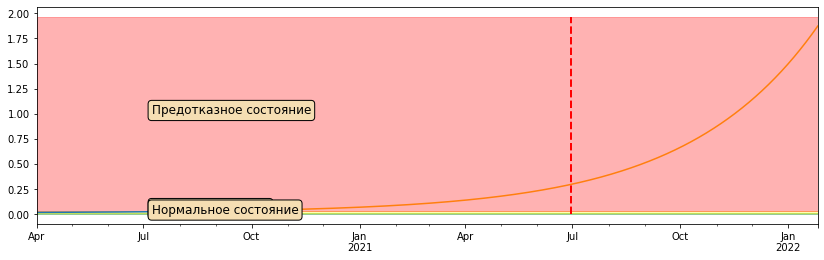

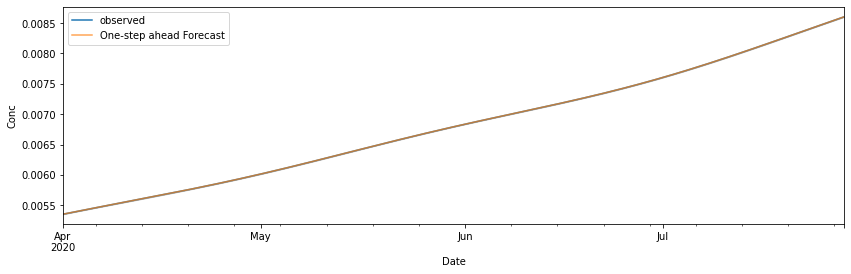

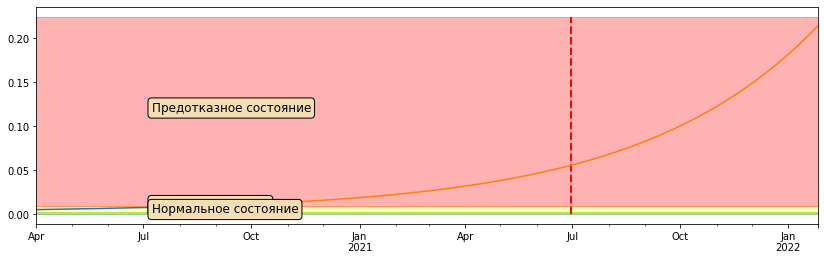

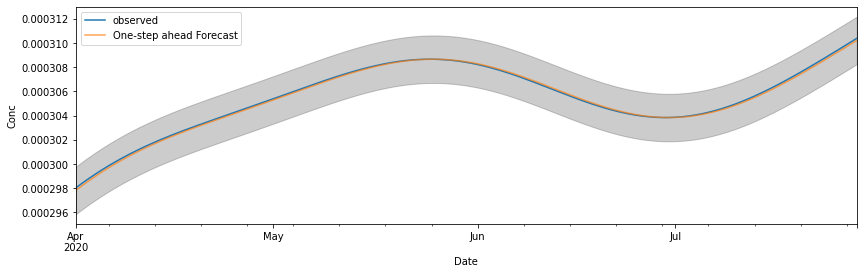

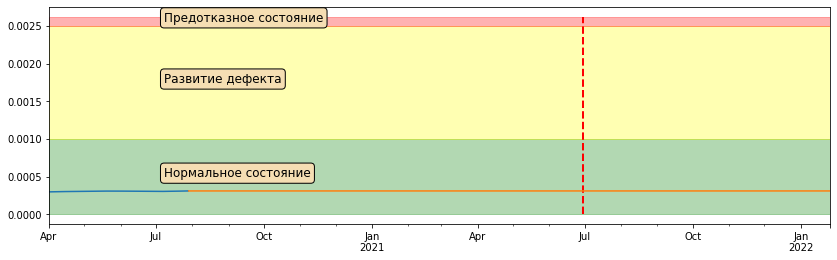

----------------------------------------------------
GAS H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 3.98e-08
----------------------------------------------------
GAS CO
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.97e-07
----------------------------------------------------
GAS C2H4
The Mean Squared Error is 0.0
The Root Mean Squared Error is 5.25e-08
----------------------------------------------------
GAS C2H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.4e-09


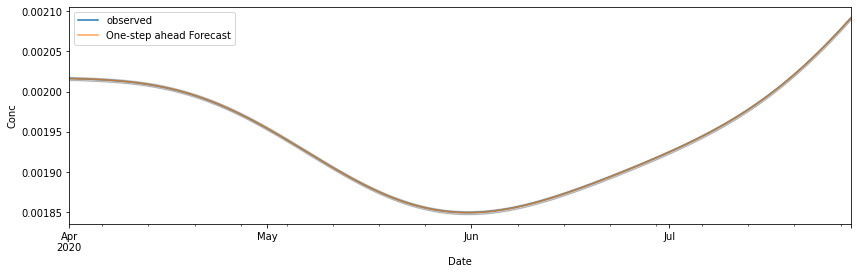

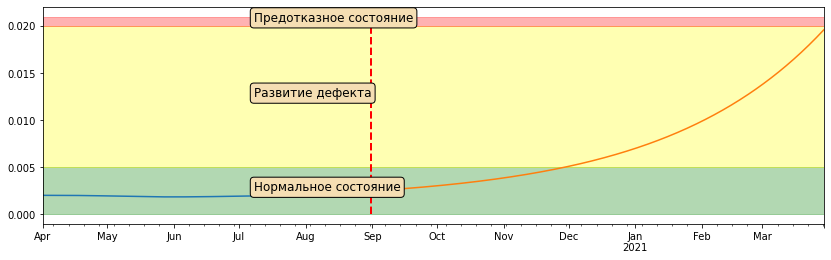

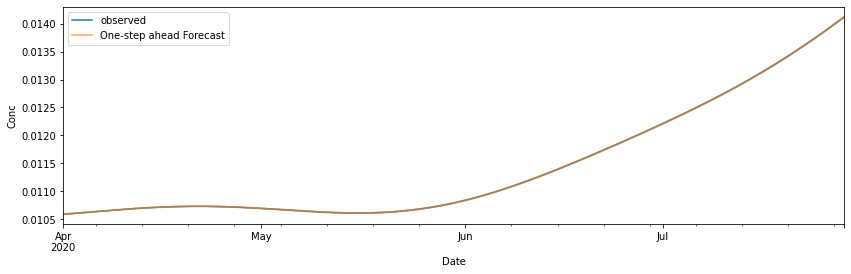

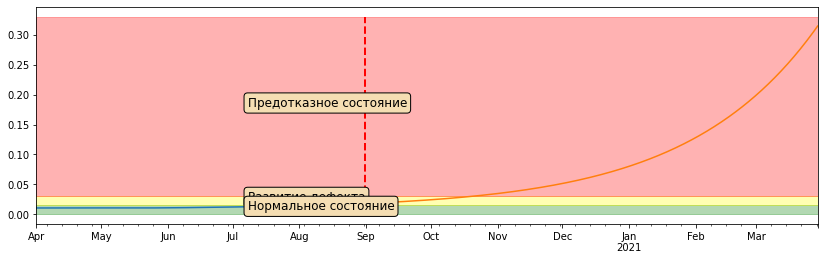

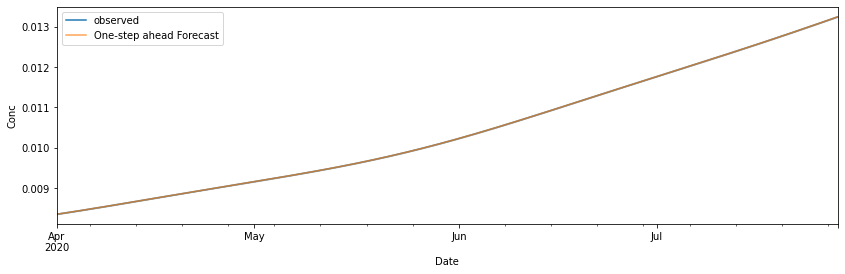

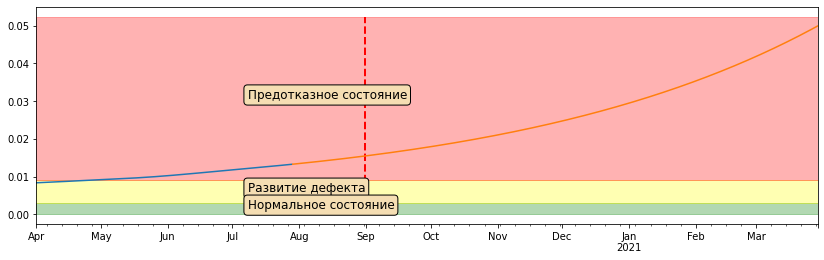

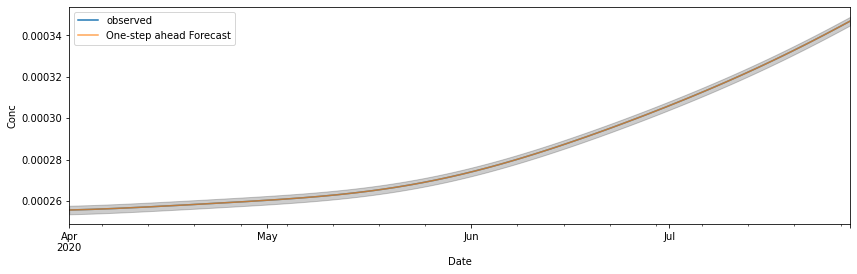

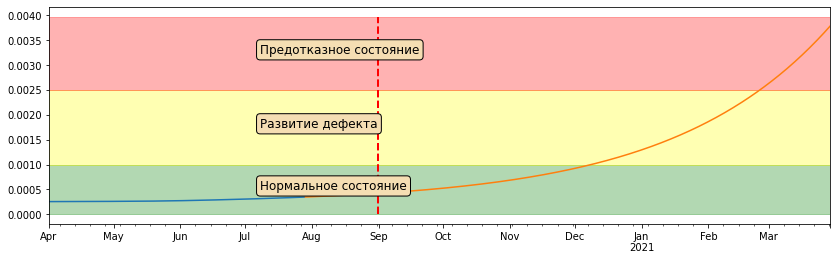

----------------------------------------------------
GAS H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.71e-08
----------------------------------------------------
GAS CO
The Mean Squared Error is 0.0
The Root Mean Squared Error is 2.163e-07
----------------------------------------------------
GAS C2H4
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.383e-07
----------------------------------------------------
GAS C2H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 3.8e-09


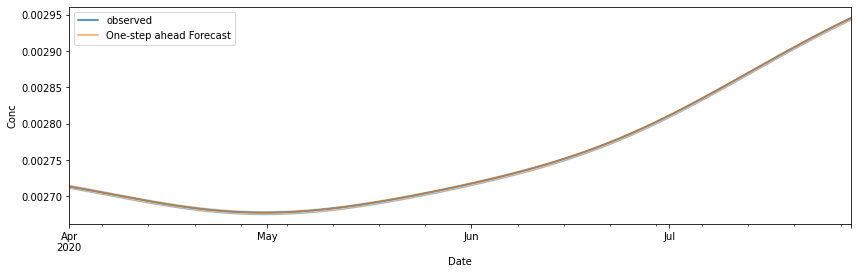

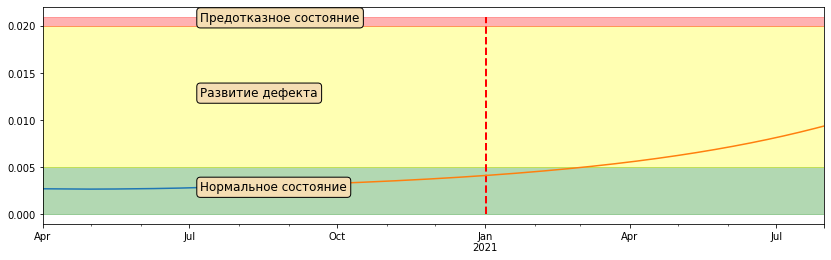

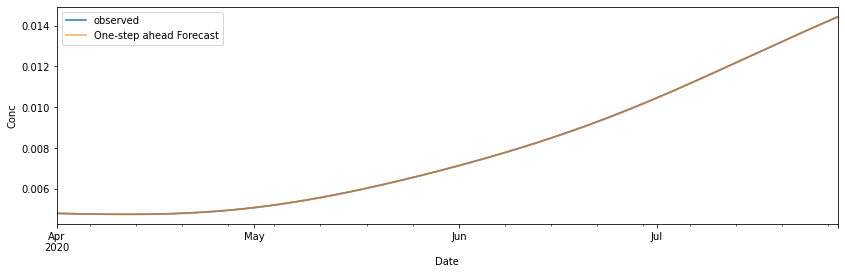

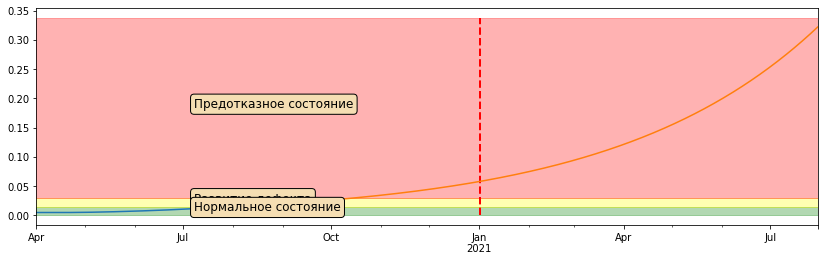

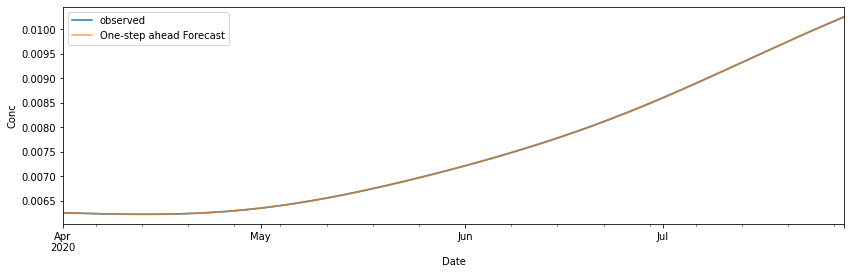

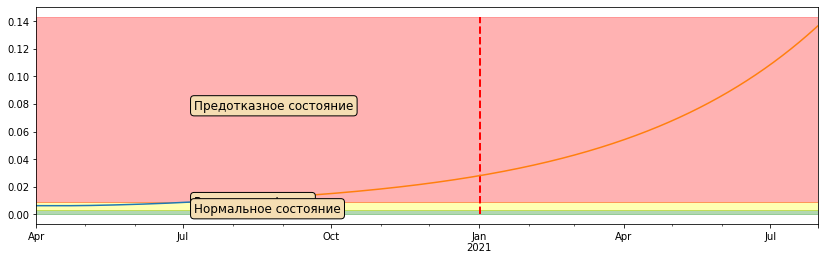

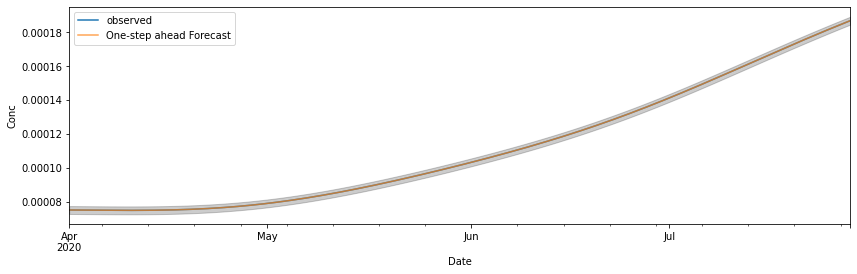

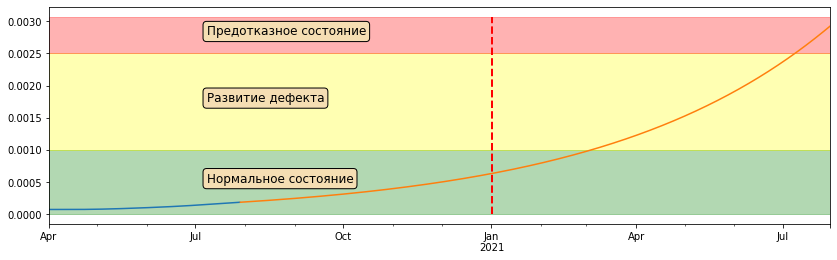

----------------------------------------------------
GAS H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 2.89e-08
----------------------------------------------------
GAS CO
The Mean Squared Error is 0.0
The Root Mean Squared Error is 3.514e-07
----------------------------------------------------
GAS C2H4
The Mean Squared Error is 0.0
The Root Mean Squared Error is 4.78e-08
----------------------------------------------------
GAS C2H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 4e-09


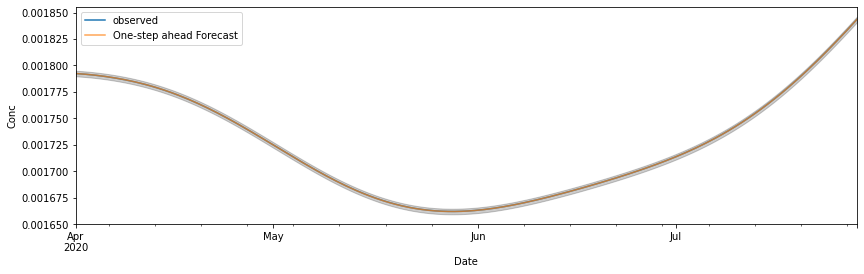

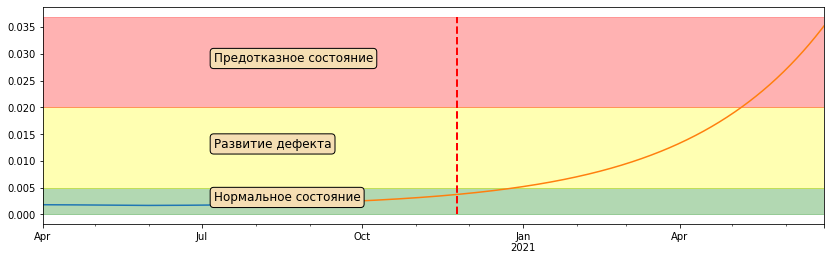

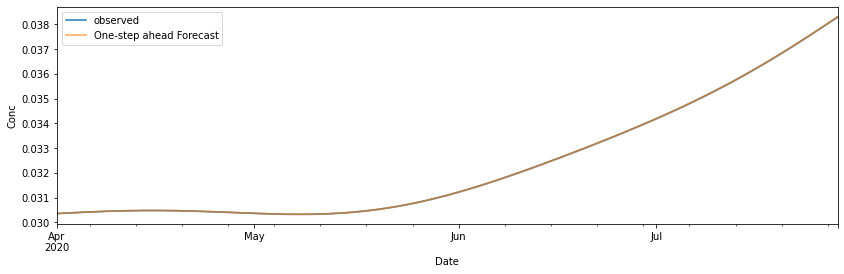

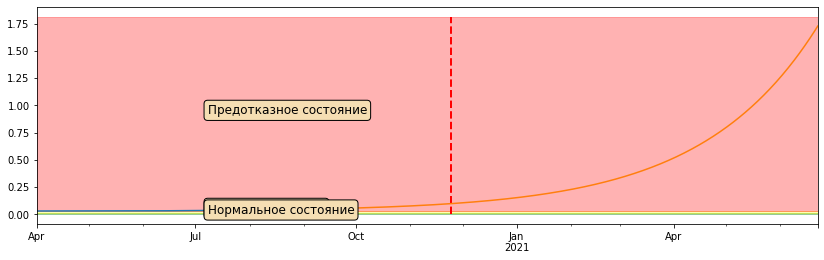

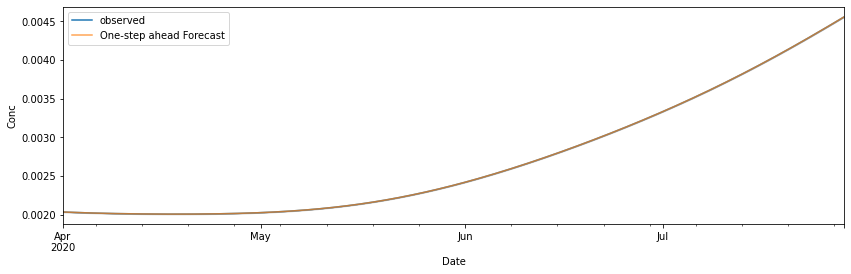

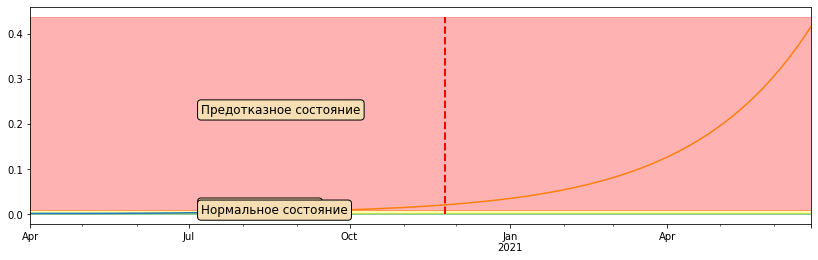

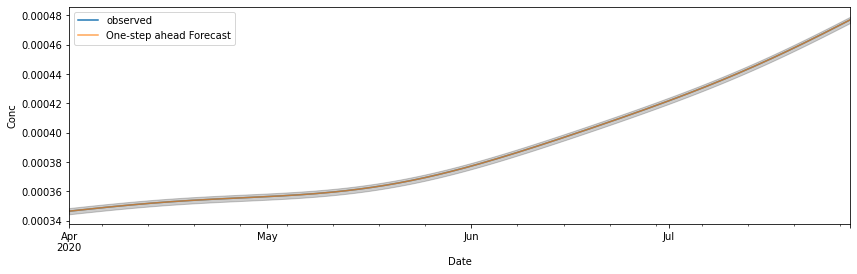

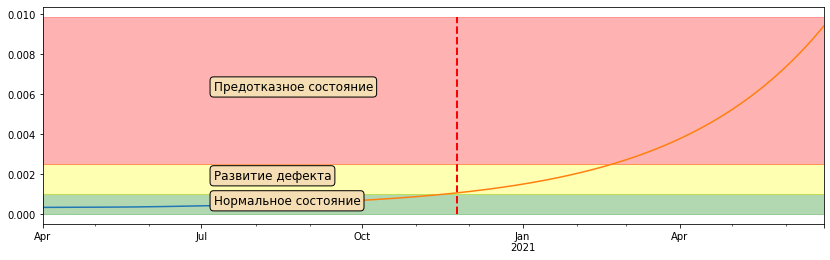

----------------------------------------------------
GAS H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 1.46e-08
----------------------------------------------------
GAS CO
The Mean Squared Error is 0.0
The Root Mean Squared Error is 5.571e-07
----------------------------------------------------
GAS C2H4
The Mean Squared Error is 0.0
The Root Mean Squared Error is 5.33e-08
----------------------------------------------------
GAS C2H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 6.54e-07


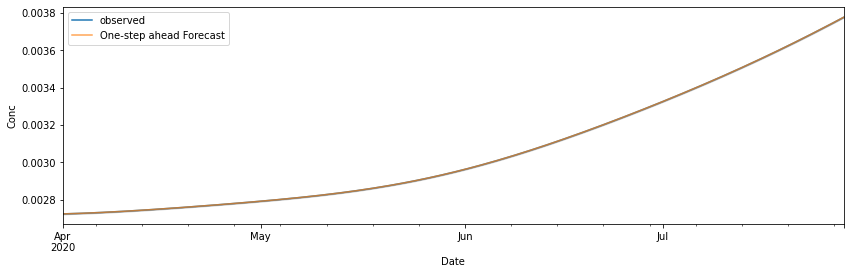

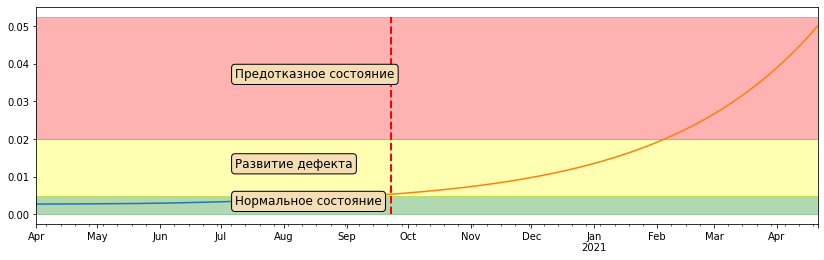

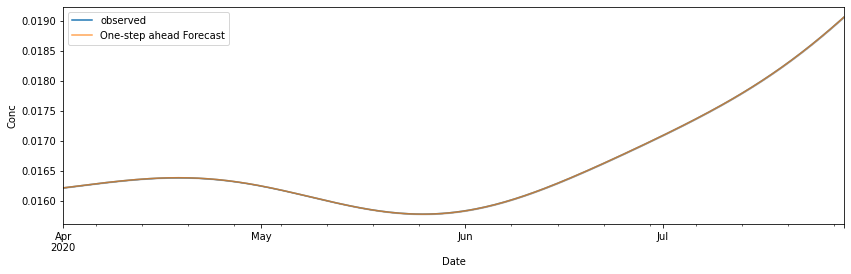

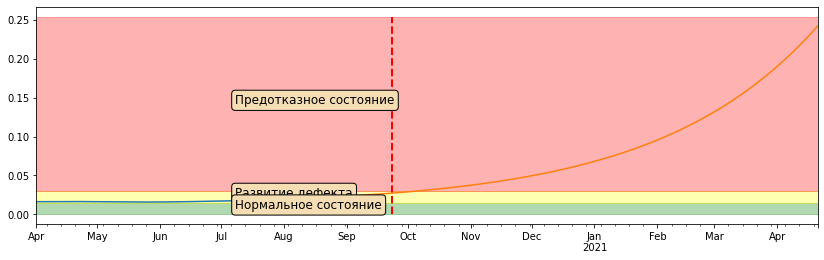

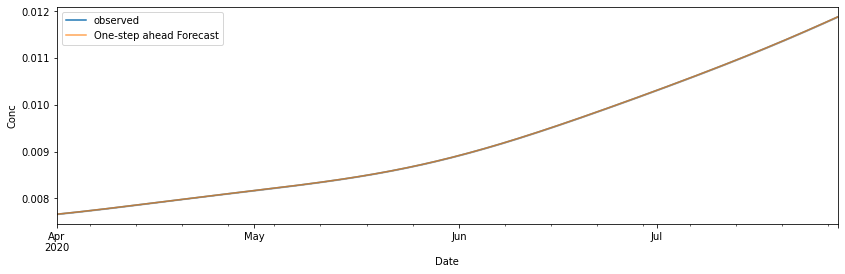

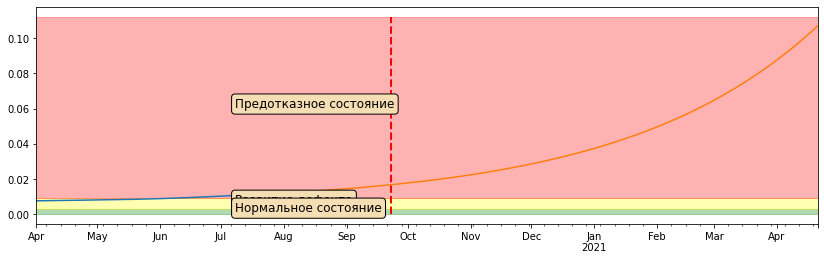

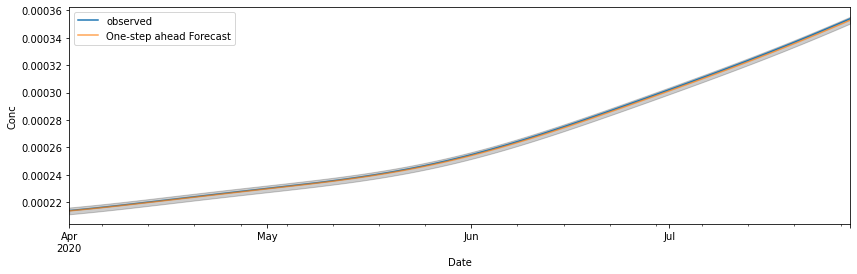

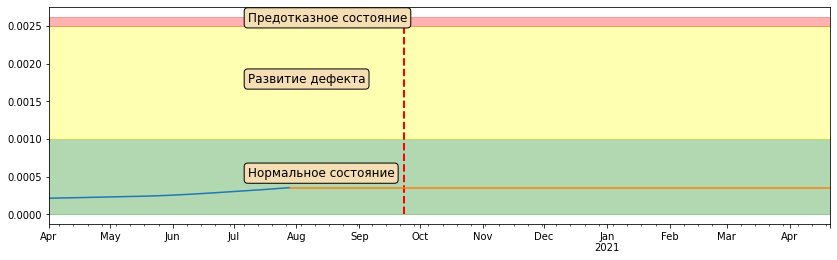

----------------------------------------------------
GAS H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 3.68e-08
----------------------------------------------------
GAS CO
The Mean Squared Error is 0.0
The Root Mean Squared Error is 5.626e-07
----------------------------------------------------
GAS C2H4
The Mean Squared Error is 0.0
The Root Mean Squared Error is 9.23e-08
----------------------------------------------------
GAS C2H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 4.4e-09


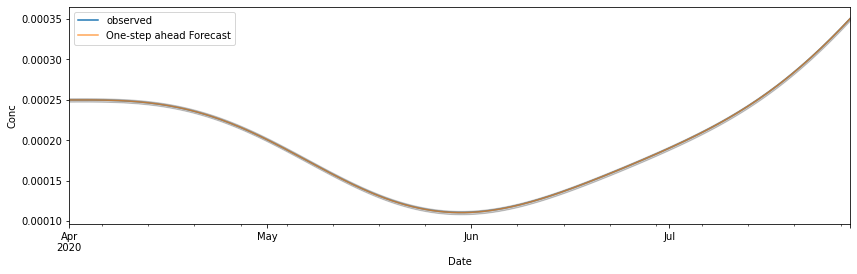

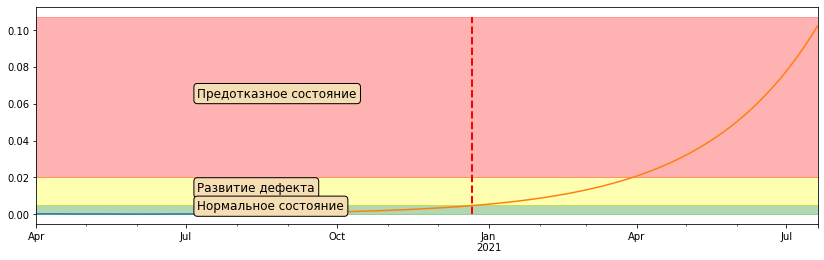

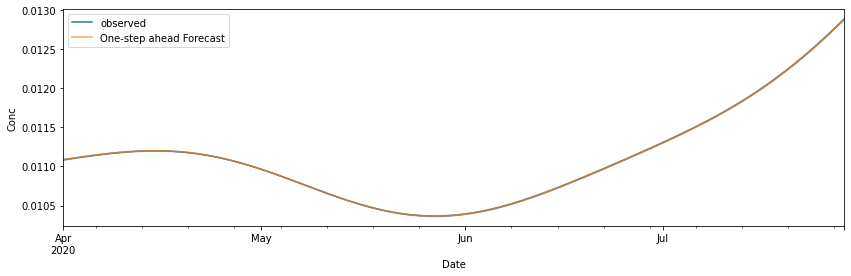

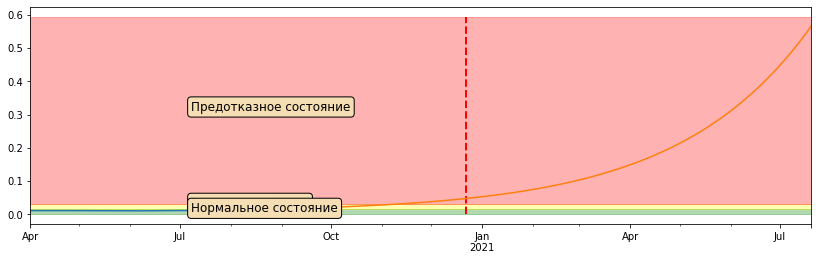

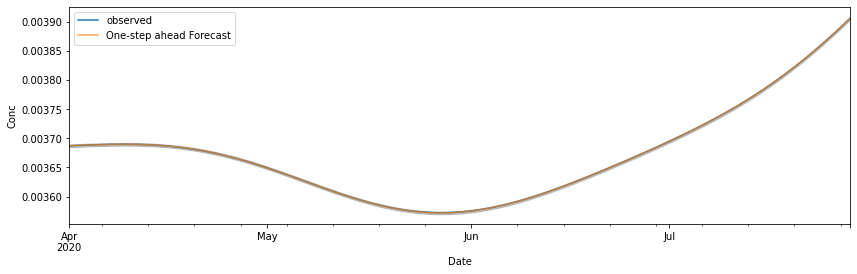

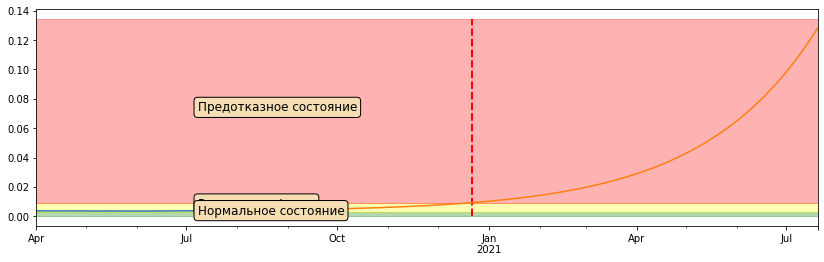

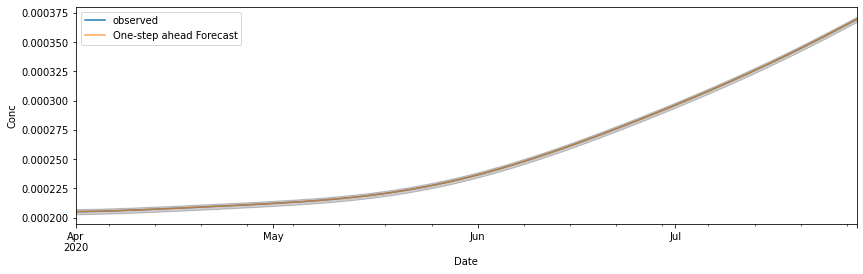

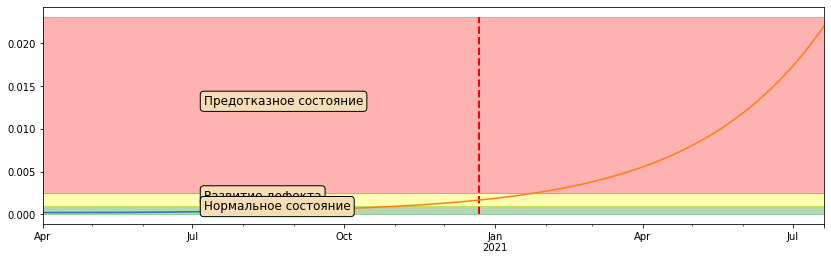

----------------------------------------------------
GAS H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 2.77e-08
----------------------------------------------------
GAS CO
The Mean Squared Error is 0.0
The Root Mean Squared Error is 2.642e-07
----------------------------------------------------
GAS C2H4
The Mean Squared Error is 0.0
The Root Mean Squared Error is 6.25e-08
----------------------------------------------------
GAS C2H2
The Mean Squared Error is 0.0
The Root Mean Squared Error is 3e-09


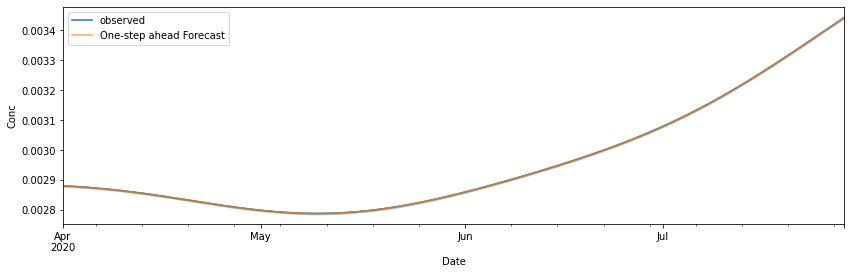

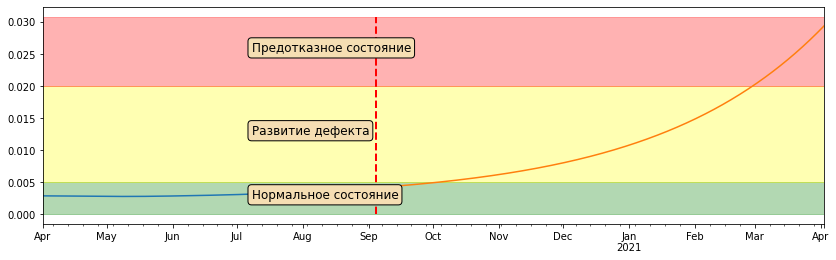

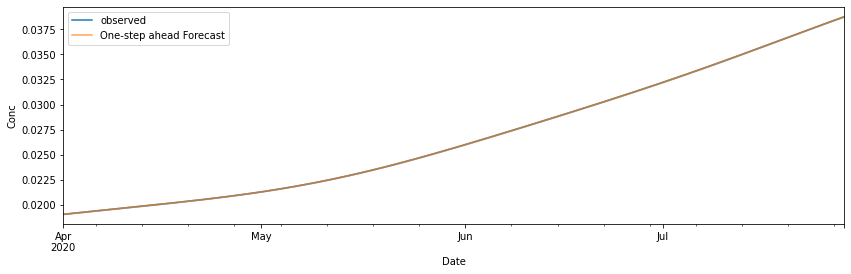

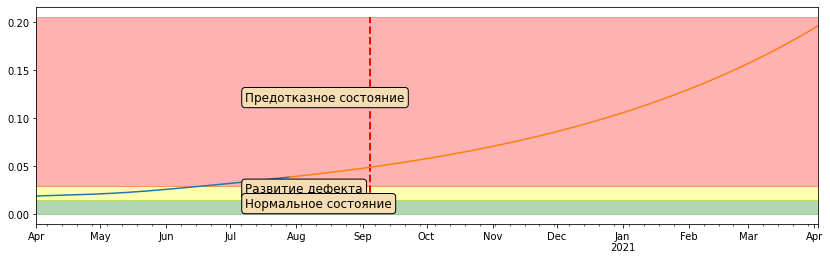

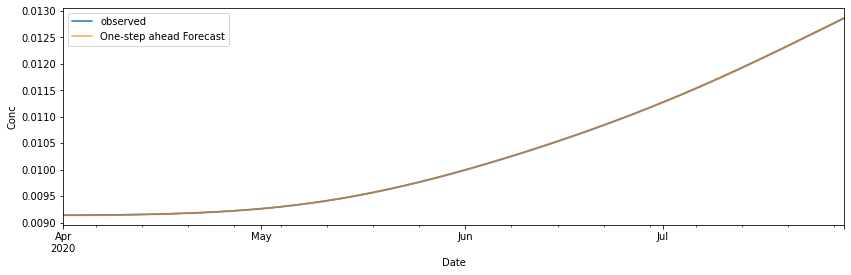

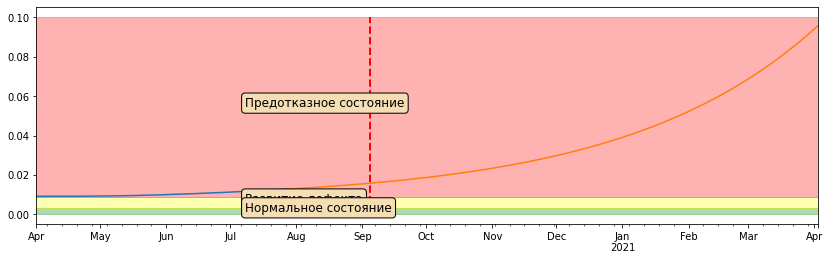

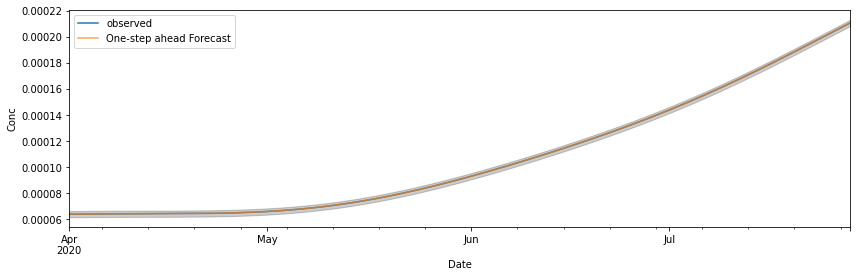

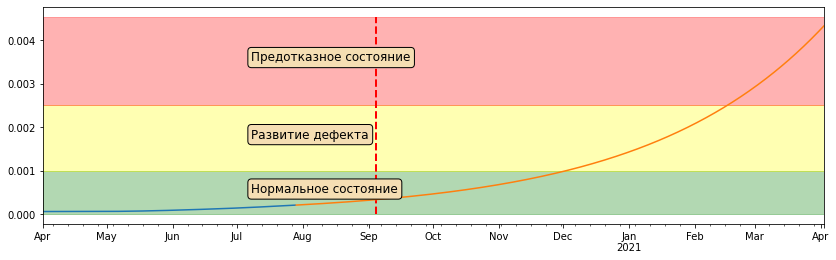

In [9]:
for file in data[:10]:
    models=funcs_for_proc.find_best_arima_model_for_gas(file)
    funcs_for_proc.plot_predict(file,models)
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-7982.947, Time=0.38 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8861.574, Time=0.08 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-8222.248, Time=0.13 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-7897.026, Time=0.48 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-7727.184, Time=0.42 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0]          
Total fit time: 1.495 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-8404.705, Time=1.21 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-7963.585, Time=0.04 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-8053.231, Time=0.15 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-7314.482, Time=0.33 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-8042.592, Time=0.91 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=-7188.672, Time=0.48 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AI

D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:267: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edg

Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-8819.431, Time=0.24 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8166.536, Time=0.09 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-8542.050, Time=0.05 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-7465.467, Time=0.50 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-7703.066, Time=1.42 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=-6698.690, Time=0.21 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-8797.374, Time=0.32 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-10.583, Time=1.19 sec
 ARIMA(1,3,1)(0,0,0)[0] intercept   : AIC=-9301.998, Time=1.10 sec
 ARIMA(0,3,1)(0,0,0)[0] intercept   : AIC=-14.594, Time=1.50 sec
 ARIMA(1,3,0)(0,0,0)[0] intercept   : AIC=-7532.826, Time=0.35 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=-8262.600, Time=2.11 sec
 ARIMA(1,3,2)(0,0,0)[0] intercept   : AIC=-1.880, Time=2.80 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept

D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:267: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edg

 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-7296.518, Time=0.82 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8158.193, Time=0.10 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-7925.341, Time=0.07 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-7941.932, Time=0.91 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-8214.501, Time=0.36 sec
 ARIMA(1,3,0)(0,0,0)[0] intercept   : AIC=-11.517, Time=0.10 sec
 ARIMA(0,3,1)(0,0,0)[0] intercept   : AIC=-12.941, Time=1.68 sec
 ARIMA(1,3,1)(0,0,0)[0] intercept   : AIC=-9.566, Time=1.81 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0] intercept
Total fit time: 5.840 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-7605.598, Time=0.54 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-7744.597, Time=0.09 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-8729.600, Time=0.22 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-8406.949, Time=0.92 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-8366.699, Time=1.69 sec
 ARIMA(2,3,1)(0,

D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:267: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edg

 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-9372.023, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-9182.991, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-9180.987, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-9519.580, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.777 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-8039.593, Time=0.59 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-9181.834, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-9179.735, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-9520.958, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.231 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-7688.657, Time=1.87 sec
 ARIMA(0,3,0)(0,0,0)[0]            

d:\projects\transformer\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,3,2)(0,0,0)[0]             : AIC=12.000, Time=0.33 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=-7769.249, Time=1.74 sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=-8162.455, Time=0.41 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=-7779.848, Time=1.49 sec
 ARIMA(3,3,3)(0,0,0)[0]             : AIC=-7861.615, Time=1.91 sec
 ARIMA(2,3,2)(0,0,0)[0] intercept   : AIC=-6347.464, Time=0.74 sec

Best model:  ARIMA(2,3,2)(0,0,0)[0]          
Total fit time: 11.837 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-8306.637, Time=0.88 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-7463.203, Time=0.08 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-9313.557, Time=0.18 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-7713.692, Time=0.79 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-9307.897, Time=0.17 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-7377.595, Time=0.87 sec
 ARIMA(1,3,0)(0,0,0)[0] intercept   : AIC=-7654.706, Time=0.27 sec

Best model

D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:267: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edg

 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-8454.058, Time=1.02 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8377.973, Time=0.09 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-7390.701, Time=0.23 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-8123.610, Time=0.91 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-8160.588, Time=1.13 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-8827.495, Time=1.08 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=-7081.502, Time=0.85 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-9137.581, Time=1.82 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=-8253.416, Time=0.95 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=-7708.191, Time=1.78 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=-8809.924, Time=0.27 sec
 ARIMA(3,3,3)(0,0,0)[0]             : AIC=-8673.806, Time=0.65 sec
 ARIMA(2,3,2)(0,0,0)[0] intercept   : AIC=-8834.460, Time=2.99 sec

Best model:  ARIMA(2,3,2)(0,0,0)[0]          
Total fit time: 15.208

D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:267: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edg

 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-9421.320, Time=0.56 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8320.301, Time=0.09 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-9327.408, Time=0.07 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-8169.214, Time=0.37 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-8098.203, Time=1.06 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-8759.179, Time=0.50 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=-8046.011, Time=2.09 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-7868.526, Time=0.48 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-8914.891, Time=0.39 sec
 ARIMA(1,3,1)(0,0,0)[0] intercept   : AIC=-9139.004, Time=2.38 sec

Best model:  ARIMA(1,3,1)(0,0,0)[0]          
Total fit time: 7.994 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-7743.850, Time=0.79 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8569.955, Time=0.09 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-7906.073, Time=0.15 sec
 ARIMA(0,

D:\Projects\transformer\funcs_for_proc.py:240: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:267: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=

 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-8202.108, Time=0.64 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-7202.690, Time=0.09 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-8953.050, Time=0.08 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-8282.673, Time=0.54 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-8767.094, Time=0.42 sec


d:\projects\transformer\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,3,1)(0,0,0)[0]             : AIC=8.000, Time=0.27 sec
 ARIMA(1,3,0)(0,0,0)[0] intercept   : AIC=-9673.401, Time=0.32 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-8469.907, Time=0.30 sec
 ARIMA(2,3,0)(0,0,0)[0] intercept   : AIC=-8819.931, Time=0.32 sec
 ARIMA(1,3,1)(0,0,0)[0] intercept   : AIC=-7.335, Time=2.44 sec
 ARIMA(0,3,1)(0,0,0)[0] intercept   : AIC=-16.434, Time=1.52 sec


d:\projects\transformer\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=10.000, Time=0.32 sec

Best model:  ARIMA(1,3,0)(0,0,0)[0] intercept
Total fit time: 7.263 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-8340.553, Time=0.16 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8821.455, Time=0.11 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-8456.394, Time=0.06 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-7387.864, Time=0.77 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-7488.130, Time=0.49 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0]          
Total fit time: 1.582 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-8722.075, Time=1.21 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-7819.375, Time=0.24 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-8000.367, Time=0.22 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-7473.550, Time=0.61 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-8727.584, Time=1.52 sec
 ARIMA(2,3,0)(0,0,0)[0]   

d:\projects\transformer\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,3,2)(0,0,0)[0]             : AIC=10.000, Time=0.32 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-7586.253, Time=2.33 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=-7977.532, Time=1.41 sec


d:\projects\transformer\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,3,2)(0,0,0)[0]             : AIC=12.000, Time=0.36 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=-8170.101, Time=0.98 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 10.818 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-8379.134, Time=1.28 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-7719.496, Time=0.11 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-8378.285, Time=0.04 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-7267.864, Time=0.57 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-7683.743, Time=1.07 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-9043.446, Time=0.21 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=-7775.255, Time=0.76 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=-8470.198, Time=0.75 sec
 ARIMA(0,3,3)(0,0,0)[0]             : AIC=-7300.035, Time=0.97 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=-8208.945, Time=0.69 sec
 ARIMA(1,3,2)(0,0,

D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:267: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edg

 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-7408.090, Time=0.63 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8682.952, Time=0.03 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-8142.850, Time=0.14 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-8115.345, Time=1.12 sec
 ARIMA(0,3,0)(0,0,0)[0] intercept   : AIC=-8537.654, Time=0.31 sec

Best model:  ARIMA(0,3,0)(0,0,0)[0]          
Total fit time: 2.235 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-7053.540, Time=0.49 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8766.942, Time=0.17 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-9497.535, Time=0.20 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-7583.984, Time=1.13 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-8633.451, Time=0.55 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-7973.422, Time=1.02 sec
 ARIMA(1,3,0)(0,0,0)[0] intercept   : AIC=-9177.371, Time=0.14 sec

Best model:  ARIMA(1,3,0)(0,0,0)[0]          
Total fit time: 3.696 seconds

D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:267: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edg

 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-9404.277, Time=0.38 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8550.373, Time=0.05 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-8659.554, Time=0.05 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-7649.102, Time=0.21 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-8717.859, Time=1.89 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-8271.453, Time=3.26 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=-7626.327, Time=1.49 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-8687.390, Time=0.25 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-8958.538, Time=2.31 sec
 ARIMA(1,3,1)(0,0,0)[0] intercept   : AIC=-8821.194, Time=0.55 sec

Best model:  ARIMA(1,3,1)(0,0,0)[0]          
Total fit time: 10.453 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-42.713, Time=0.27 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-8564.969, Time=0.07 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-7136.578, Time=0.14 sec
 ARIMA(0,3

D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:267: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edg

 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-9204.939, Time=0.44 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-7943.519, Time=0.10 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-9051.809, Time=0.05 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=-8148.742, Time=0.43 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=-8157.616, Time=1.20 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=-7824.574, Time=3.14 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=-8261.733, Time=1.38 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=-9081.947, Time=0.38 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=-8924.841, Time=0.87 sec
 ARIMA(1,3,1)(0,0,0)[0] intercept   : AIC=-8839.807, Time=0.84 sec

Best model:  ARIMA(1,3,1)(0,0,0)[0]          
Total fit time: 8.836 seconds
Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=-8067.561, Time=0.61 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=-7330.843, Time=0.07 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=-6942.993, Time=0.10 sec
 ARIMA(0,

D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:267: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:265: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
D:\Projects\transformer\funcs_for_proc.py:266: UserWarning: Setting the 'color' property will override the edg

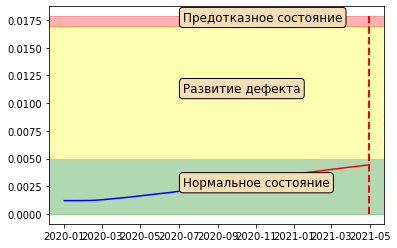

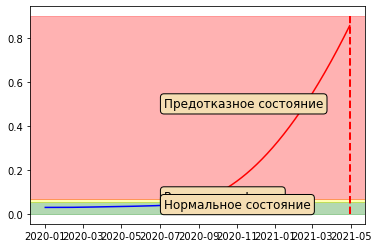

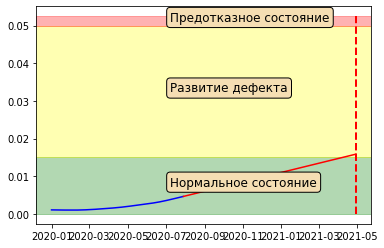

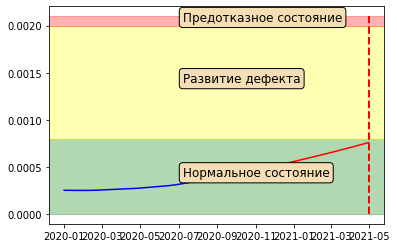

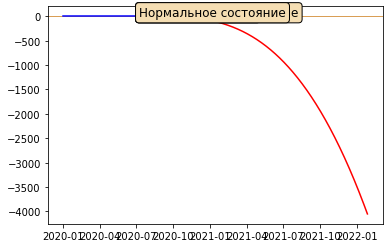

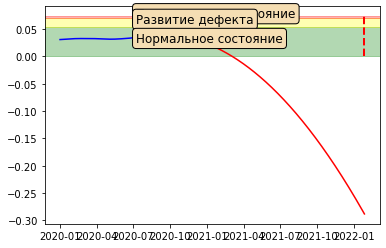

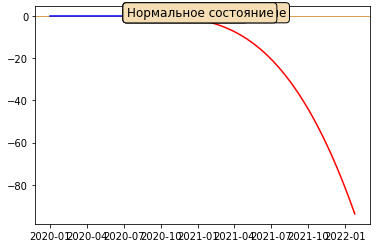

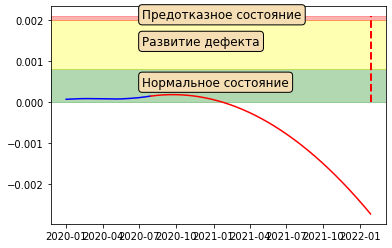

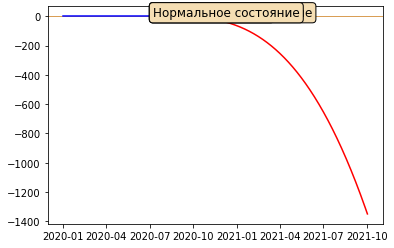

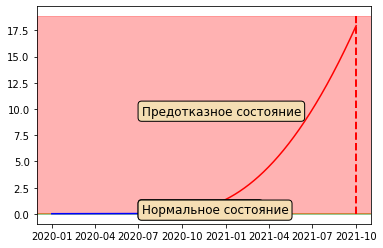

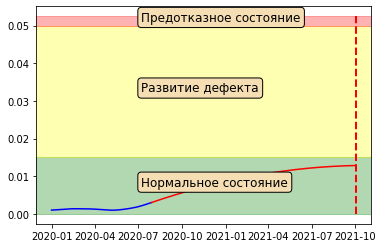

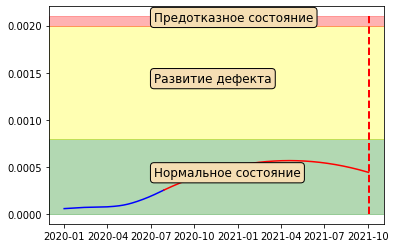

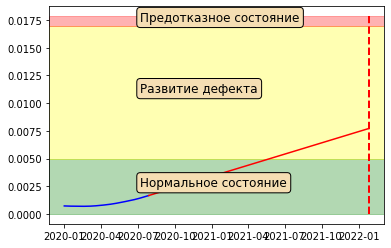

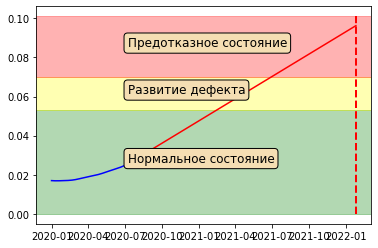

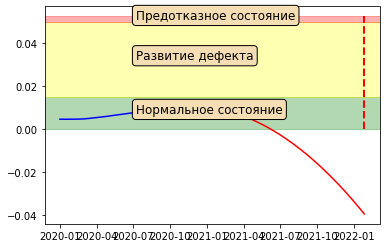

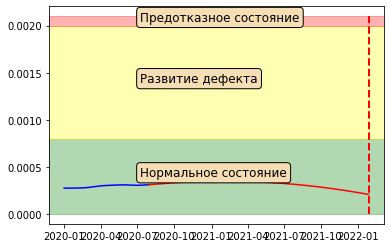

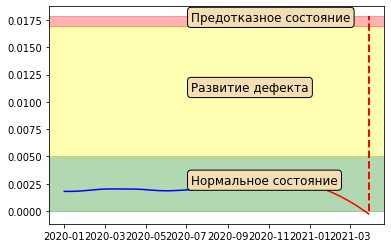

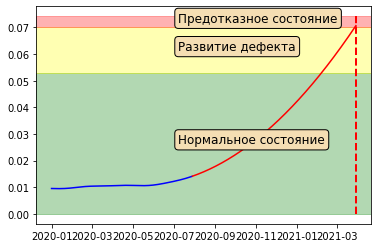

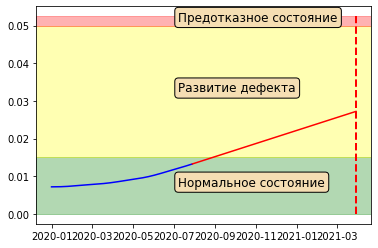

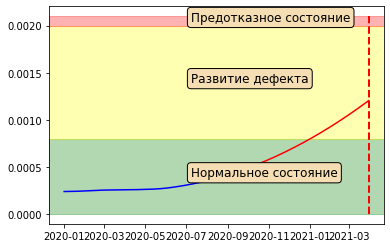

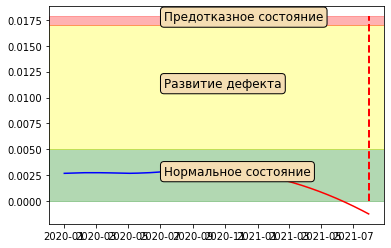

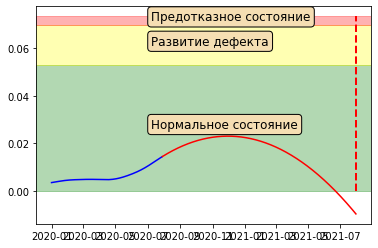

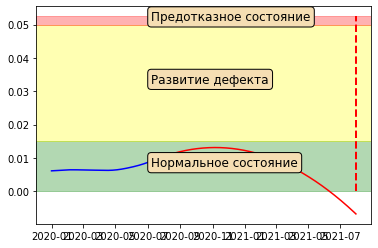

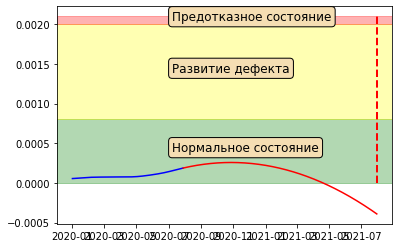

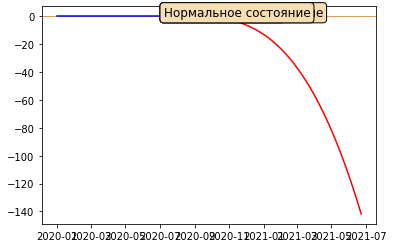

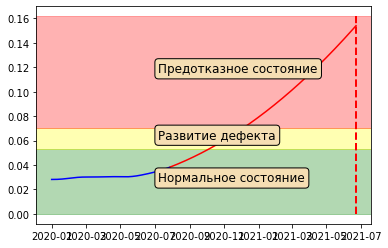

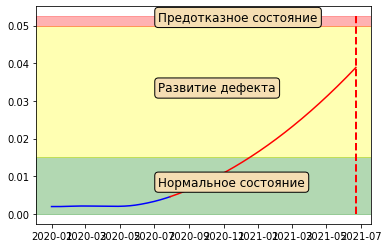

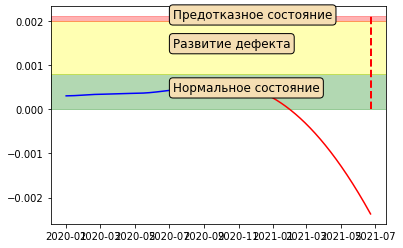

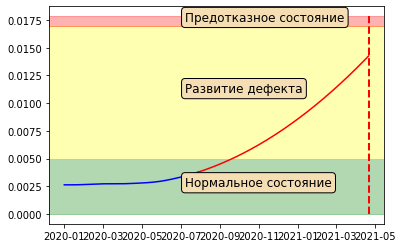

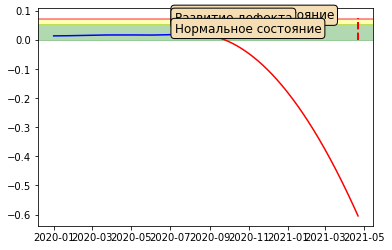

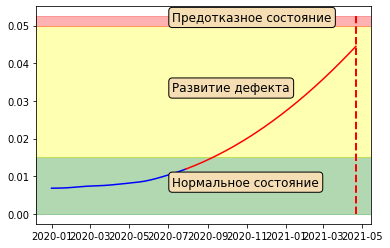

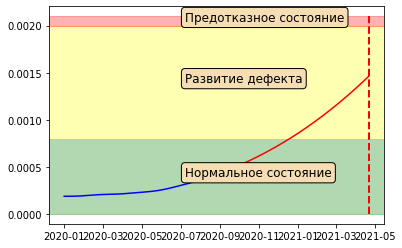

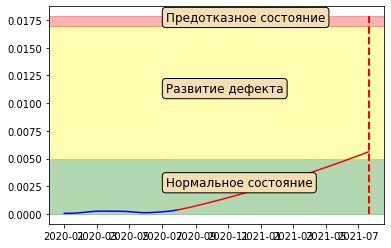

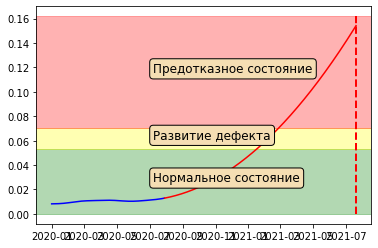

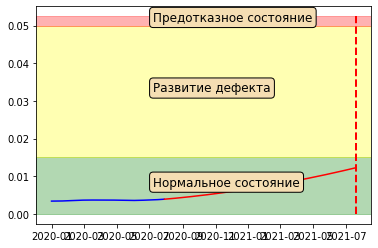

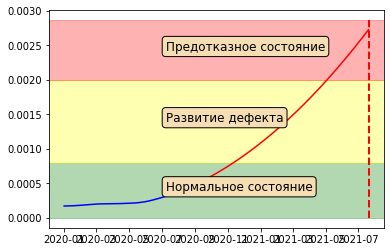

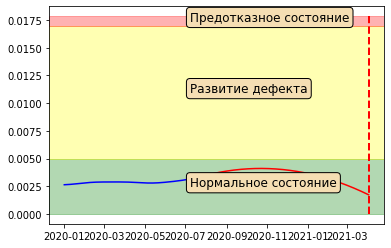

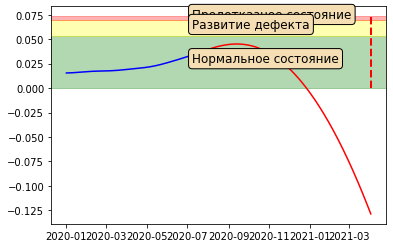

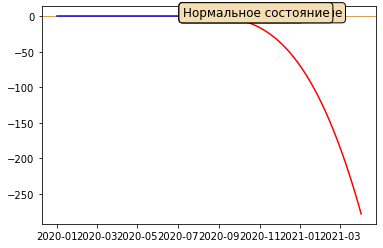

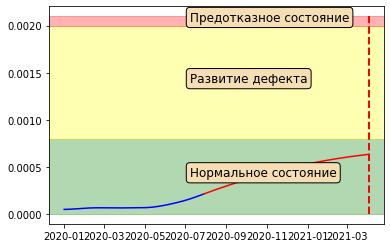

In [4]:
import funcs_for_proc
for file in data[:10]:
    models=funcs_for_proc.auto_arima(file)
    funcs_for_proc.plot_predict_auto_arima(file,models)